## Projet: Grand projet Machine Learning 

#### GROUPE 7:  Loan Default Prediction 

**-- AZIABLE Etsé** 

**-- COULIBALY Kiyali**

**-- TUNGAMWESE Carlène**

#### Contexte :
Les institutions financières doivent évaluer le risque de défaut de paiement des prêts.
Des prévisions précises peuvent aider à prendre des décisions de prêt éclairées.
L'apprentissage automatique peut analyser les données historiques pour prédire les défauts de paiement.

#### Objectif :
Créer un modèle permettant de prédire si un prêt sera en défaut de paiement en fonction des données du demandeur.
Identifier les facteurs les plus importants contribuant aux défauts de paiement.

#### Défis :
Gérer des ensembles de données déséquilibrés où les valeurs positives(**Default = oui**) sont moins fréquentes.

##### Approche

1. **Exploration des données**
   - Analyser la distribution des variables.
   - Comprendre la relation entre les variables indépendantes et la variable dépendante (**Default**) : stat descriptives(Uni et bivariées).

2. **Prétraitement des données**
   - Gérer les valeurs manquantes.
   - Encoder les variables catégorielles.
   - Normaliser/standardiser les variables numériques.
   

3. **Fractionnement des données**
   - Divisez l'ensemble de données en ensembles d'entraînement et de test.
   - Utiliser des méthodes de ré-echantillonnages (StratifiedKFold, SMOTE, où SMOTE+ RandomUnderSampler) pour gérér le problème de désequilibre des classes de la variable cible

4. **Modélisation**
   - Les algorithmes d'apprentissage automatique utilisés : 

    ---> KNN

    ---> Régression logistique, 
    
    ---> XGBoost,ADABoost.

5. **Évaluation des modèles**
   
   ---> Accuracy, La Précision, Le F1_score, le Recall 
   
   ---> La Matrice de confusion AUC-ROC
   

6. **Interprétation des résultats**
   - Identifier les variables les plus importantes pour prédire le risque de crédit.
   - Analyser les tendances et les informations obtenues à partir du modèle.


#### Résultats attendus (Après la mise en production)

- Réduction du taux de défaut en identifiant les clients à haut risque avant d'accorder le crédit.
- Augmentation de l'efficacité et la précision de l'évaluation du risque de crédit.
- Fournir des informations précieuses qui peuvent être utilisées pour améliorer les politiques et stratégies de crédit.

### Choix des métriques pour l'évaluation des modèles

Le choix de ou des métrices d'evaluation va dependre de: 

**Coût et impact des erreurs** : Evaluation du  coût associé aux différentes erreurs (faux positifs et faux négatifs). 

Un faux négatif (ne pas détecter un défaut réel) pourrait être beaucoup plus coûteux qu'un faux positif (prédire un défaut qui n'existe pas) et vice versa.

Le **recall** (sensibilité): c'est une métrique d'évaluation cruciale dans un projet de machine learning visant à prédire le défaut de remboursement d'un prêt. Il mesure la proportion de véritables cas positifs (les défauts de remboursement) qui sont correctement identifiés par le modèle.

Dans le contexte de prédiction de défaut de remboursement, il est souvent très important de détecter un maximum de ces défauts pour éviter des pertes financières la structure. 
Un faible recall signifierait que le modèle manque beaucoup de cas où le client fait réellement défaut, ce qui pourrait entraîner des décisions de prêt risquées et potentiellement des pertes importantes.

Ainsi, en utilisant le recall comme métrique d'évaluation, on s'assure que le modèle est bien calibré pour détecter le plus grand nombre possible de cas à risque (défauts), même si cela signifie accepter un certain nombre de fausses alertes (faux positifs).


Cependant l'utisation du **recall** comme seule métrique d'évaluation performance de notre modèle peut s'avéré insuffisant pour diverse raisons: 


1. **Fausses alertes (faux positifs)** : Un modèle avec un recall très élevé peut marquer beaucoup de prêts comme à risque (défaut potentiel) pour maximiser la détection des défauts réels. Cela pourrait entraîner un grand nombre de faux positifs, c'est-à-dire des cas où le modèle prédit un défaut alors que le prêt est en fait remboursé correctement. Cela peut causer des opportunités manquées et des décisions trop conservatrices.

2. **Précision (precision)** : En complément du recall, la précision mesure la proportion de prédictions positives qui sont réellement correctes. Un modèle équilibré doit non seulement détecter les défauts, mais aussi minimiser le nombre de faux positifs. Une faible précision pourrait signifier que le modèle est inutilement pessimiste.

3. **F1-Score** : Le F1-score combine à la fois le recall et la précision en une seule métrique (moyenne harmonique). Il est particulièrement utile lorsqu'on cherche un compromis entre la détection des défauts et la minimisation des fausses alertes.


##### Description des données

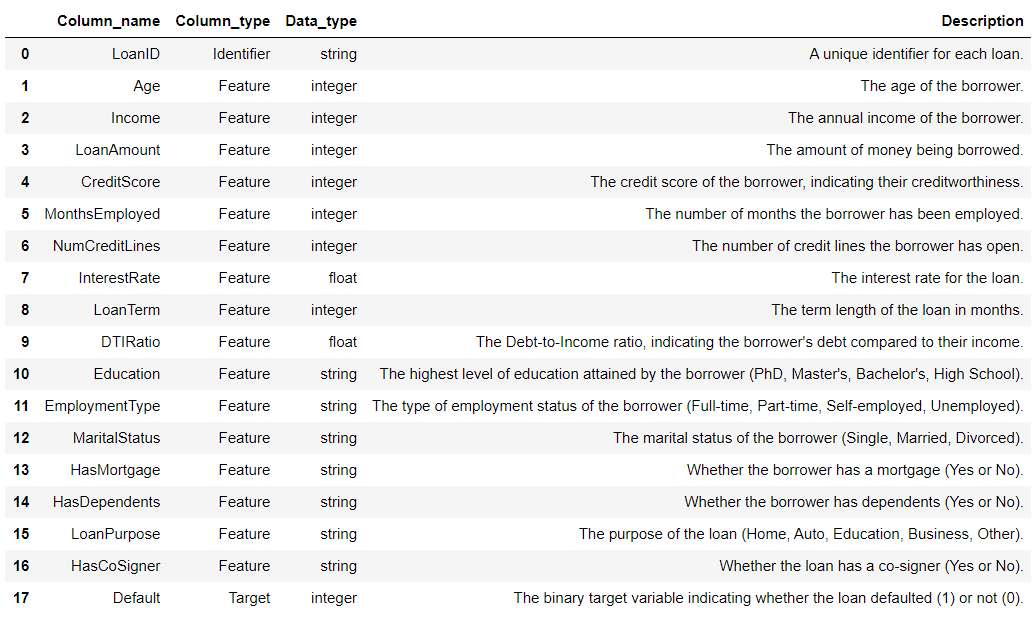

**Source des données**: Cet ensemble de données a été tiré du Loan Default Prediction Challenge de Coursera **(kaggle)**

**Lien**: https://www.kaggle.com/datasets/nikhil1e9/loan-default?select=Loan_default.csv

#### Installation des packages nécessaires

In [1]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install alive-progress

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


##### Importer les librairies necessaires 

In [154]:
# Manipulation des données 
import pandas as pd 
import numpy as np 

# Visualisation des données
import matplotlib.pyplot  as plt 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go

# Tests statistique(khi-deux)
from scipy.stats import chi2_contingency

# Gestion des message d'averstissement()
import warnings
warnings.filterwarnings("ignore")

# afficher des barres de progression  dans le notebooks Jupyter. 
from alive_progress import alive_bar
import time

# Afficher les version des lib 
import watermark

# Pour le preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

# Pour l'apprentissage
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score, train_test_split

# Importer toutes les métriques pour l'évaluation
from sklearn.metrics import *   

# Initialiser la bibliothèque JavaScript de SHAP
shap.initjs()

# Feature importance
import shap

# DeepLearning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# afficher les versions des bibliothèques et des dépendances utilisées
%reload_ext watermark
%watermark -a "Library versions" --iversions


Author: Library versions

keras     : 3.5.0
watermark : 2.4.3
matplotlib: 3.8.0
plotly    : 5.9.0
xgboost   : 2.1.1
sklearn   : 1.2.2
tabulate  : 0.9.0
shap      : 0.46.0
pandas    : 2.2.2
seaborn   : 0.12.2
numpy     : 1.26.4
tensorflow: 2.17.0



##### 1- Charger la base de donnée et prise en main des données

In [155]:
# Charger les données
df = pd.read_csv(r"C:\Users\nosty\Desktop\Projet_ML\Loan_default.csv")

In [156]:
# Description des données:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [157]:
# Afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)

# Afficher un échantillon aléatoire de 5 individus
df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
79254,7Y2AC4M8FQ,20,111644,231164,401,20,4,3.71,24,0.61,PhD,Full-time,Married,Yes,Yes,Other,No,0
184440,HQPOAOTHKC,48,35945,12810,562,29,4,6.53,60,0.35,Bachelor's,Unemployed,Single,No,No,Other,No,0
241750,9XOLJVBZRG,28,116580,184126,347,118,3,12.21,24,0.49,Master's,Part-time,Divorced,No,No,Business,Yes,0
207171,P0U2AHUM5Z,26,18650,102214,717,1,2,17.69,36,0.33,PhD,Part-time,Single,Yes,Yes,Auto,No,1
101411,KEDOEIG3X8,57,85957,56403,453,102,4,18.91,48,0.71,Master's,Part-time,Married,Yes,No,Auto,No,0


In [158]:
# La dimension du dataframe 
print(f"\n Le dataset contient: {df.shape[0]} lignes et \n {df.shape[1]} colonnes")


 Le dataset contient: 255347 lignes et 
 18 colonnes


In [159]:
# Le type de données des variables 
print("\n Le type des différentes colonnes est: ")
df.dtypes


 Le type des différentes colonnes est: 


LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

#### 2- Analyse exploratoire des données(EDA)

In [160]:
# Statistisques descriptives 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


#### Commentaires 

**Age** :  L'âge moyen des emprunteurs est d'environ 43 ans avec un âge minimum de 18 ans et un âge maximum de 69 ans 

**Income (Revenu)** : Le revenu moyen des emprunteurs est de 82 499 dollars par an. Les revenus varient de 15 000 $  à 149 999 $.

**LoanAmount (Montant du prêt)** : Le montant moyen des prêts est de 127,579 $. Le montantant prêté varit entre 5,000 dollars et 249,499 dollars.

**CreditScore (Score de crédit)** : Le score de crédit moyen est de 574 avec des scores de crédit variantt entre 300  à 849 .

**MonthsEmployed (Mois d'emploi)** : Les emprunteurs ont en moyenne 60 mois d'emploi, avec des mois d'emploi oxcillant entre 0 mois  à 119 mois .

**NumCreditLines (Nombre de lignes de crédit)** : Les emprunteurs ont en moyenne 2,5 lignes de crédit.

**InterestRate (Taux d'intérêt)** : Le taux d'intérêt moyen est de 13,49 % avec des valeurs oxcillant entre  2 % et 25 %.

**LoanTerm (Durée du prêt)** :  La durée moyenne des prêts est de 36 mois. Les durées des prêts varient de 12 mois  à 60 mois.

**DTIRatio (Ratio d'endettement)** :  Le ratio d'endettement moyen est de 0,50. Ce ratio varient de 0,1  à 0,9 .

**Default (Défaut de paiement)** :  La proportion de défaut de paiement est de 11,6 %.
  

In [161]:
# Récherche de doublons via la variable "LoanID"

if df['LoanID'].nunique() < df.shape[0]:
    print(f"Le dataset contient {df.shape[0] - df['LoanID'].nunique()} doublons")
else:
    print("\n Le dataset ne contient pas de doublons")



 Le dataset ne contient pas de doublons


Il est toujours important de verifier si notre dataset contient des doublons car la presence de doublons dans notre dataset va biaiser nos résultats

In [162]:
# Nous pouvons maintenant supprimer la colonne LoanID pour une meilleur organisation
df.drop(['LoanID'], axis=1, inplace=True)

In [163]:
# Régroupement des variables par type

CATEGORICALS = df.select_dtypes(include=['object']).columns
NUMERICS = df.select_dtypes(include=['int64', 'float64']).columns

In [164]:
print(f"\nLes variables catégorielles sont:\n{CATEGORICALS} \n Et les Numeriques:\n{NUMERICS}")


Les variables catégorielles sont:
Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object') 
 Et les Numeriques:
Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


##### ANALYSE UNIVARIEE

In [165]:
# Distibution des données Categorielles
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\n La distribution of: {col}\n")
        print(df[col].value_counts())




 La distribution of: Education

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

 La distribution of: EmploymentType

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

 La distribution of: MaritalStatus

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

 La distribution of: HasMortgage

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

 La distribution of: HasDependents

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

 La distribution of: LoanPurpose

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

 La distribution of: HasCoSigner

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64



##### 1. **Éducation**
- **Distribution uniforme :** : Les quatre niveaux d'éducation (Bachelor's, High School, Master's, PhD) sont représentés de manière presque égale, avec des effectifs très similaires pour chaque catégorie.

#####  2. **Type d'Emploi (EmploymentType)**
- **Distribution: uniforme :** : Les quatre types d'emploi (Part-time, Unemployed, Self-employed, Full-time) sont également répartis, avec une légère variation  des effectifs (autour de 63 000 à 64 000).

##### 3. **Statut Marital (MaritalStatus) :**
- **Distribution uiniforme :** : Les trois statuts (Married, Divorced, Single) sont également proches en termes d'effectifs, chacun autour de 85 000.

##### 4. **Possession d'un Crédit Hypothécaire (HasMortgage) :**
- **Distribution uniforme :** : Les réponses "Yes" et "No" sont presque parfaitement équilibrées, avec environ 127 677 et 127 670 observations respectivement.


##### 5. **Présence de Dépendants (HasDependents) :**
- **Distribution** : Les réponses "Yes" et "No" sont également très proches, avec 127 742 pour "Yes" et 127 605 pour "No".

##### 6. **But du Prêt (LoanPurpose) :**
- **Distribution** : Les cinq catégories (Business, Home, Education, Other, Auto) sont relativement équilibrées, avec des effectifs autour de 51 000 chacune.


##### 7. **Présence d'un Cosignataire (HasCoSigner) :**
- **Distribution uniforme :** : Les réponses "Yes" et "No" sont presque parfaitement équilibrées, avec respectivement 127 701 et 127 646 observations.


In [166]:
# Distibution de la variable cible (Default de remboursement)
print("\nDistribution de la variable d'interêt:")
df['Default'].value_counts(normalize=True)


Distribution de la variable d'interêt:


Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

#### Commentaire
La distribution de la variable cible "Default" montre les proportions des emprunteurs qui sont en défaut (1) par rapport à ceux qui ne le sont pas (0). 

- **Proportion des Non-Défaillants (0)** : 88,39 % des emprunteurs ne sont pas en défaut. Cela signifie que la grande majorité des emprunteurs dans l'échantillon respectent leurs engagements financiers et parviennent à rembourser leurs prêts.

- **Proportion des Défaillants (1)** : 11,61 % des emprunteurs sont en défaut. Ce pourcentage plus faible montre qu'une minorité des emprunteurs rencontre des difficultés à honorer leurs paiements.

#### Implications de la Distribution de la variable cible:

**Déséquilibre de Classe** : La distribution est déséquilibrée, avec une majorité d'observations appartenant à la classe "0" (non-défaillants). Ce déséquilibre est important à noter car il peut poser des défis lors de la modélisation. 
Les modèles prédictifs peuvent devenir biaisés en faveur de la classe majoritaire, ce qui pourrait diminuer la précision dans la détection des cas de défaut (classe minoritaire).


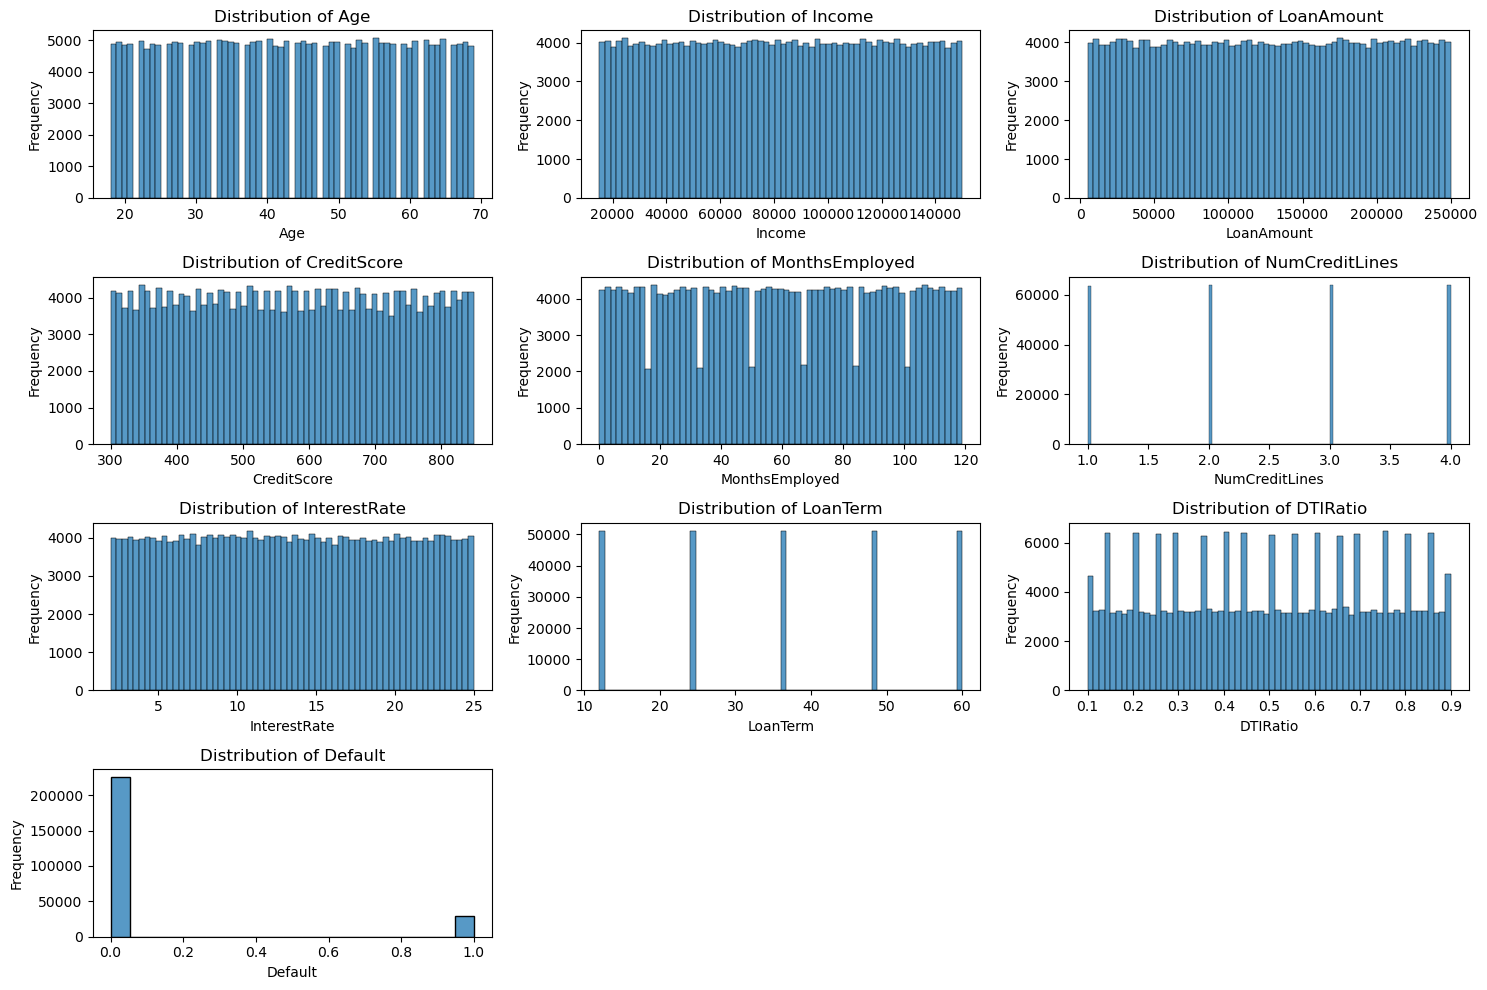

In [167]:
# Garphique de Distribution des variables numeriques
plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


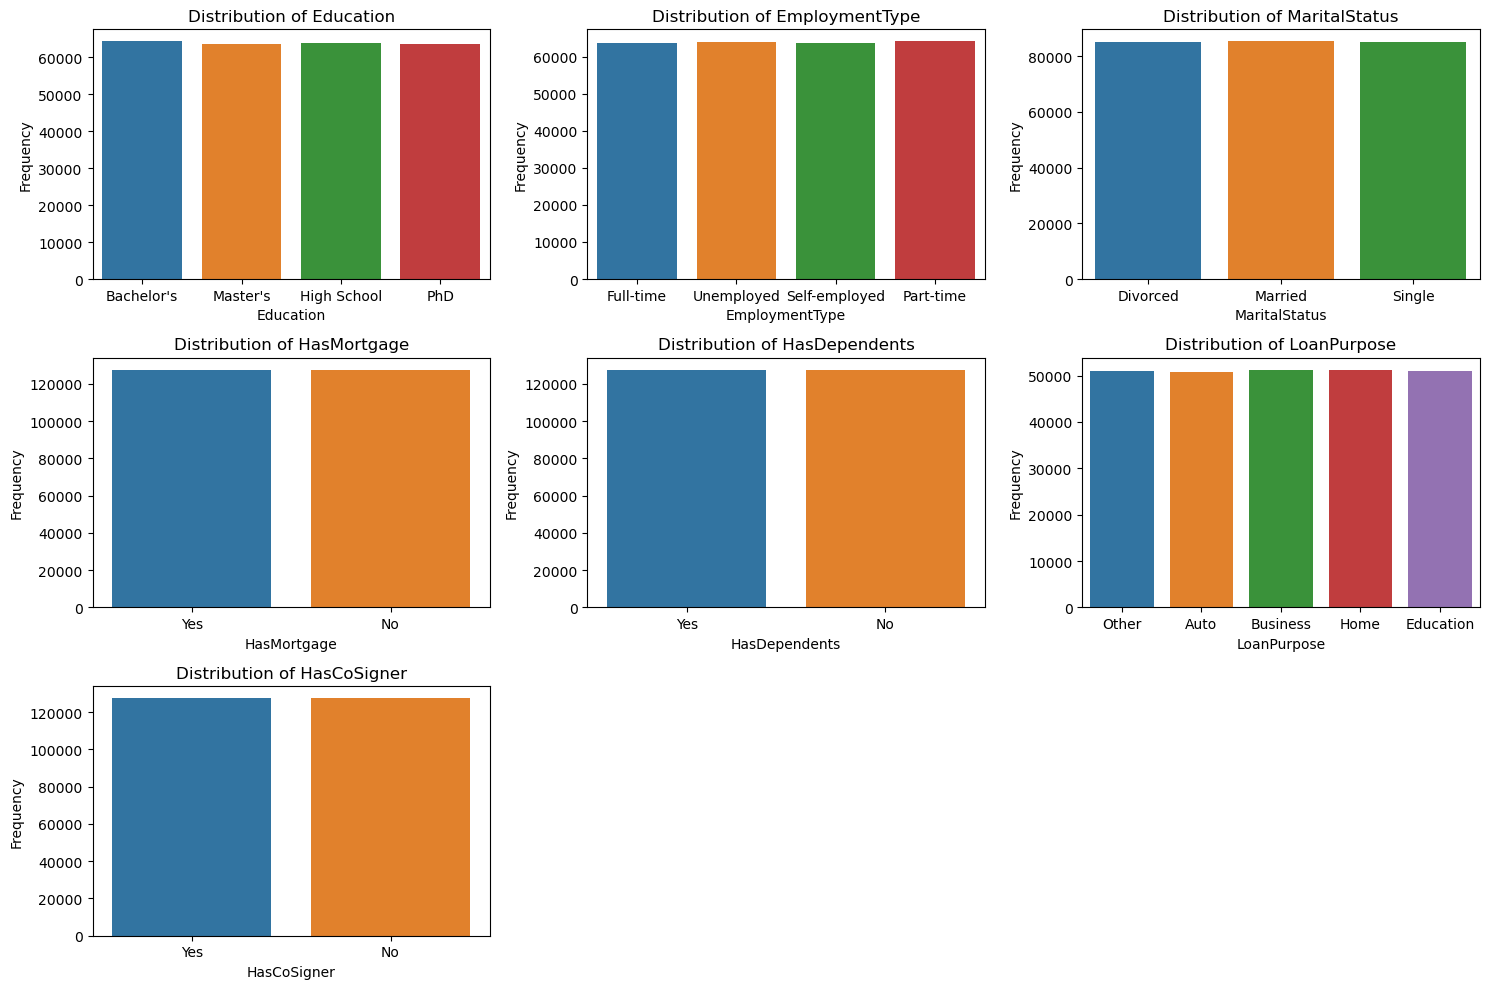

In [168]:
# Garphique de Distribution des variables Catégorielles
plt.figure(figsize=(15, 10))
for i, col in enumerate(CATEGORICALS):
    plt.subplot(len(CATEGORICALS) // 3 + 1, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### ANALYSE BIVARIEE

In [169]:
# Création de tableaux croisés entre notre variable cible et les variables catégorielle

for var in CATEGORICALS:
    table = pd.crosstab(index=df[var], columns=df['Default'], margins=True)
    
    # Renommer les colonnes 
    table.rename(columns={1: 'Effectif_Default', 'All': 'Effectif_Total'}, inplace=True)
    
    # Calcul du taux de défaut de remboursement
    table['Taux_Default (%)'] = (table['Effectif_Default'] / table['Effectif_Total'] * 100).round(3)
    
    # Réorganisation du tableau 
    table = table[['Effectif_Total', 'Effectif_Default', 'Taux_Default (%)']]
    
    print(f"\nTableau de contingence entre '{var}' et 'Default' de remboursement :\n")
    print(table)
    print("\n" + "="*60 + "\n")   #  formatage 



Tableau de contingence entre 'Education' et 'Default' de remboursement :

Default      Effectif_Total  Effectif_Default  Taux_Default (%)
Education                                                      
Bachelor's            64366              7789            12.101
High School           63903              8230            12.879
Master's              63541              6908            10.872
PhD                   63537              6726            10.586
All                  255347             29653            11.613



Tableau de contingence entre 'EmploymentType' et 'Default' de remboursement :

Default         Effectif_Total  Effectif_Default  Taux_Default (%)
EmploymentType                                                    
Full-time                63656              6024             9.463
Part-time                64161              7677            11.965
Self-employed            63706              7302            11.462
Unemployed               63824              8650            

### Commentaire

**Education et Default** :
   - Le taux de défaut est le plus élevé chez les personnes ayant un diplôme **Bachelor's** (12.101 %) ou  de  **High School** (12,879 %) comparativement chez celles ayant un **PhD** (10,586 %). Cela suggère que l'éducation supérieure est associée à un risque légèrement moindre de défaut de paiement.

**EmploymentType et Default** :
   - Les **chômeurs** ont le taux de défaut le plus élevé (13,553 %), tandis que les **travailleurs à plein temps** ont le taux le plus bas (9,463 %). Ce résultat est intuitif, car les personnes sans emploi sont plus à risque de ne pas pouvoir rembourser leurs prêts.

**MaritalStatus et Default** :
   - Les personnes **divorcées** affichent un taux de défaut plus élevé (12,533 %), tandis que les personnes **mariées** ont le taux le plus bas (10,397 %). Cela pourrait refléter une plus grande stabilité financière chez les personnes mariées.

**HasMortgage et Default** :
   - Les emprunteurs **sans hypothèque** ont un taux de défaut plus élevé (12,345 %) que ceux avec une hypothèque (10,881 %). Cela pourrait indiquer que les propriétaires d'une hypothèque gèrent mieux leurs finances ou sont perçus comme moins risqués par les prêteurs.

**HasDependents et Default** :
   - Les personnes **sans personnes à charge** présentent un taux de défaut plus élevé (12,724 %) par rapport à celles avec des personnes à charge (10,502 %). Cela peut sembler contre-intuitif, mais il est possible que ceux avec des personnes à charge soient plus prudents financièrement.

**LoanPurpose et Default** :
   - Les prêts pour **business** ont le taux de défaut le plus élevé (12,326 %), tandis que les prêts pour la **maison** ont le taux le plus bas (10,235 %). Cela peut refléter des risques plus élevés associés aux prêts commerciaux par rapport aux prêts pour l'achat ou la rénovation de biens immobiliers.

**HasCoSigner et Default** :
   - Les emprunteurs **sans cosignataire** ont un taux de défaut plus élevé (12,866 %) par rapport à ceux avec un cosignataire (10,360 %). Avoir un cosignataire peut apporter une sécurité supplémentaire pour le remboursement du prêt, réduisant ainsi le risque de défaut.

In [170]:
# Tester la relation entre chaque variable catégorielle et la Target (Default)

tables = {var: pd.crosstab(df[var], df['Default']) for var in CATEGORICALS}
results = []
for var, table in tables.items():
    stat, p, dof, expected = chi2_contingency(table)
    significant = p < 0.05                             # Significativité: (p < 0.05)
    
    results.append({
        'Variable': var,
        'Chi_square_statistic': stat,
        'Degrees_of_freedom': dof,
        'P_value': p,
        'Significant': '***' if significant else ''
    })

summary_table = pd.DataFrame(results)

# Affichage du tableau récapitulatif en format Markdown 
try:
    import tabulate
    print(summary_table.to_markdown(index=False))
except ImportError:
    print("""La bibliothèque 'tabulate' n'est pas installée. 
          Affichage du tableau sans formatage Markdown.""")
    print(summary_table)
print("\n *** : Significatif au seuil seuil 5% ")

| Variable       |   Chi_square_statistic |   Degrees_of_freedom |      P_value | Significant   |
|:---------------|-----------------------:|---------------------:|-------------:|:--------------|
| Education      |                214.019 |                    3 | 3.94049e-46  | ***           |
| EmploymentType |                529.745 |                    3 | 1.70664e-114 | ***           |
| MaritalStatus  |                200.361 |                    2 | 3.1055e-44   | ***           |
| HasMortgage    |                133.252 |                    1 | 7.96338e-31  | ***           |
| HasDependents  |                306.851 |                    1 | 1.06001e-68  | ***           |
| LoanPurpose    |                127.934 |                    4 | 1.07679e-26  | ***           |
| HasCoSigner    |                390.305 |                    1 | 7.10343e-87  | ***           |

 *** : Significatif au seuil seuil 5% 


#### Commentaire

Les résultats du test du chi carré examinent la relation entre différentes variables catégorielles et  le défaut de paiement sur un prêt.



Les résultats montrent des associations significatives entre toutes les variables analysées et la variable dépendante (défaut de paiement sur un prêt), avec des valeurs p très inférieures au seuil de 0,05. 

- **Education** : La statistique du test du khi-deux vaut 214.019. cela  suggère que le niveau d'éducation influence fortement le risque de défaut.

- **EmploymentType** : Avec une statistique ddu khi-deux 529.745, le type d'emploi a une association particulièrement forte, indiquant que les emprunteurs ayant des emplois différents présentent des risques de défaut variés.

- **MaritalStatus et HasDependents** : Ces variables montrent également des associations significatives, suggérant que le statut marital et la présence de personnes à charge peuvent impacter la capacité de remboursement de l'individu.

- **HasMortgage** et **HasCoSigner** : La possession d'un crédit hypothécaire et la présence d'un cosignataire semblent également jouer un rôle important dans le risque de défaut avec des p_valeurs tous significatifs(inf à 0.05).


In [171]:
# Supprimer la Target 'Default' dans la liste des Features numercis
NUMERICS = [col for col in NUMERICS if col != 'Default']
print("\nLes variables numériques:")
NUMERICS


Les variables numériques:


['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio']

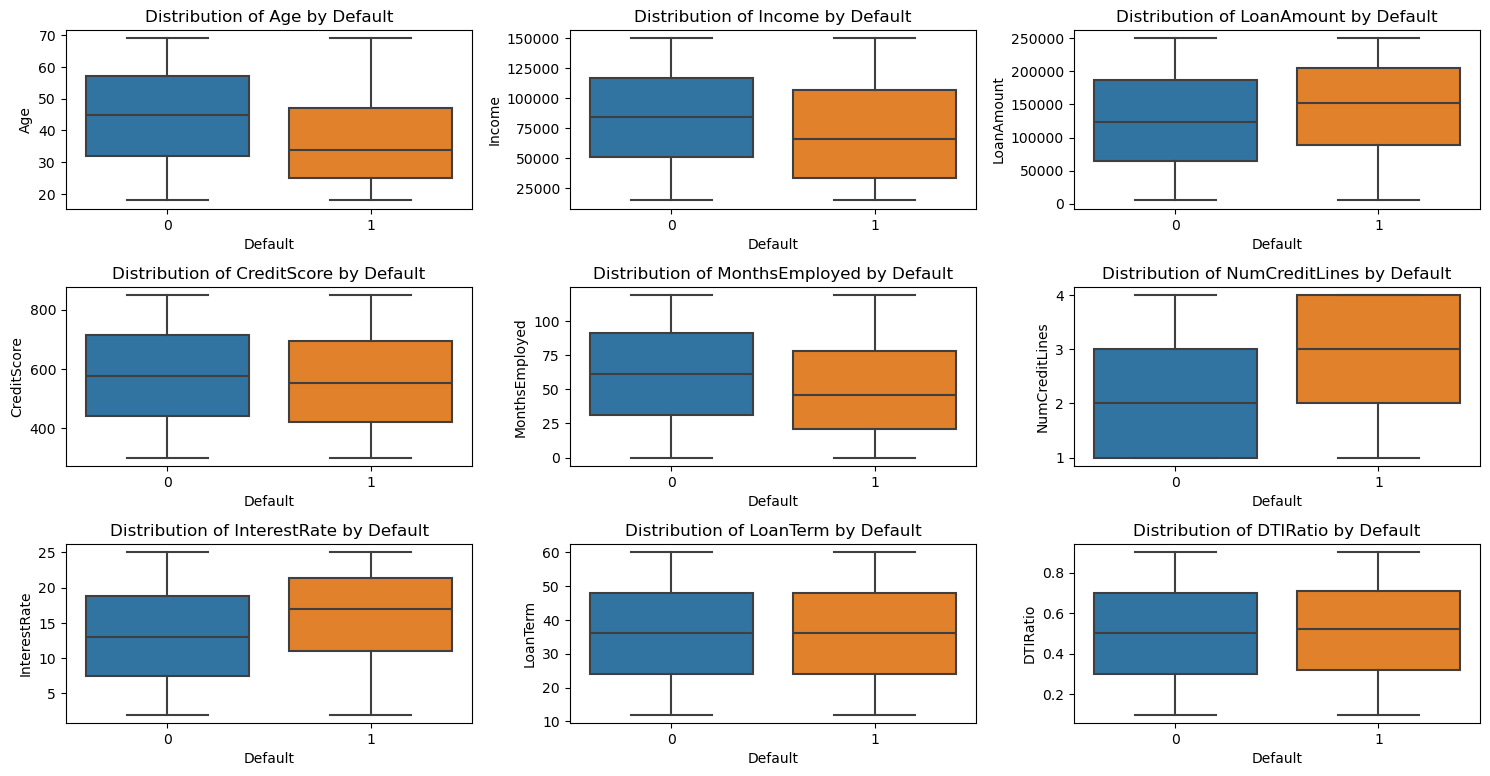


 0: Pas de Defaut de remboursement
 1: Defaut de remboursement


In [172]:
# Rélation entre Default(Defaut de rembourssemnt) et explicatives continue: Boxplot

plt.figure(figsize=(15, 10))
for i, col in enumerate(NUMERICS):
    plt.subplot(len(NUMERICS) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x='Default', y=col)
    plt.title(f'Distribution of {col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n 0: Pas de Defaut de remboursement\n 1: Defaut de remboursement")


##### Commentaires

1. **Âge** : Les individus en situation de défaut ont une distribution d'âge légèrement plus jeune que ceux qui ne le sont pas.

2. **Revenu** : Les personnes ayant fait défaut présentent des revenus généralement plus faibles par rapport à celles sans défaut.

3. **Montant du prêt** : Les montants des prêts sont plus élevés chez les emprunteurs en défaut.

4. **Score de crédit** : Les scores de crédit sont généralement plus bas pour les personnes en défaut.

5. **Mois d'emploi** : Les emprunteurs en défaut tendent à avoir un nombre de mois d'emploi inférieur.

6. **Nombre de lignes de crédit** : Les individus en défaut possèdent généralement moins de lignes de crédit.

7. **Taux d'intérêt** : Les taux d'intérêt appliqués aux emprunteurs en défaut sont plus élevés.

8. **Durée du prêt** : Les prêts accordés aux personnes en défaut ont tendance à être de durée plus courte.

9. **Ratio dette/revenu (DTI)** : Le ratio DTI est plus élevé chez les emprunteurs en défaut.


##### Analyse 


Ces résultats révèlent des différences significatives entre les emprunteurs en défaut et ceux qui ne le sont pas. L'âge plus jeune des emprunteurs en défaut, associé à des revenus plus bas et à des scores de crédit inférieurs, indique une vulnérabilité économique accrue. De plus, les montants de prêts plus élevés et les taux d'intérêt plus élevés soulignent une exposition au risque financier. 

La durée plus courte des prêts et le ratio DTI plus élevé chez les emprunteurs en défaut suggèrent des pressions financières accrues, rendant le remboursement plus difficile. Globalement, ces facteurs peuvent servir d'indicateurs de risque pour les prêteurs, leur permettant de mieux évaluer la solvabilité des emprunteurs.

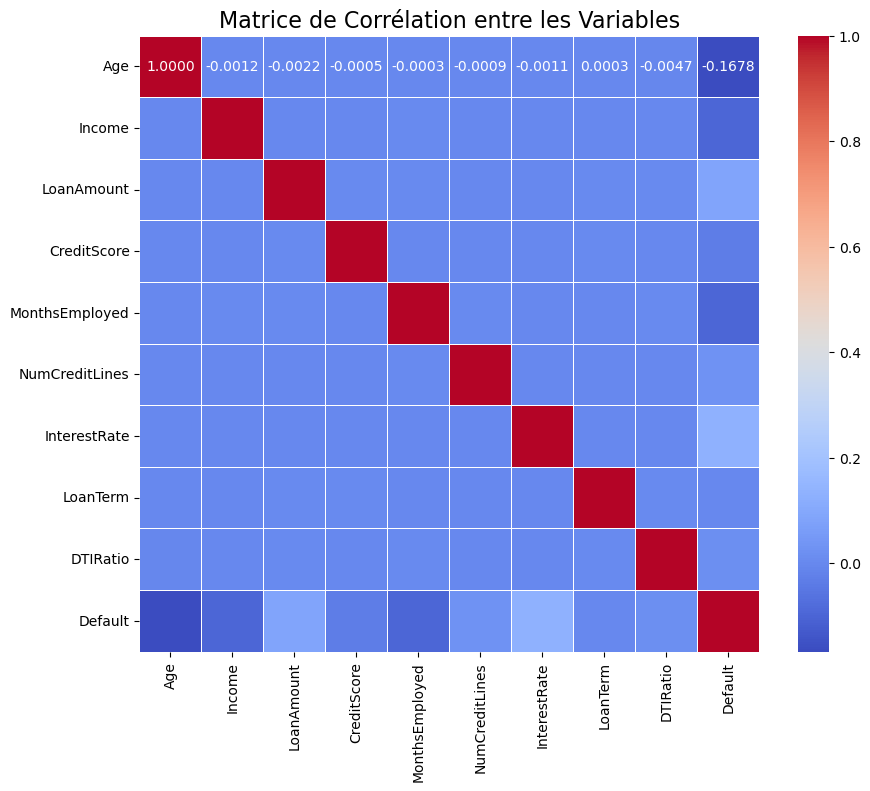

In [173]:
# la matrice de corrélation: Rélation entre 'Default' et explicatives  continues: 
# Permet de soupçonnner un un problème d'endogenéité
correlation_matrix = df[NUMERICS + ['Default']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables', fontsize=16)
plt.show()

#### Commentaire

L'analyse de la corrélation entre les variables explicatives et la variable cible, ainsi qu'entre les variables explicatives elles-mêmes, permet d'identifier des relations potentielles. Si certaines variables explicatives présentent des corrélations élevées entre elles, cela peut révéler un problème d'endogénéité.

La matrice de corrélation entre  les différentes variables explicatives analysées présentent des corrélations très faibles entre elles, ce qui suggère qu'elles capturent des dimensions distinctes des caractéristiques des emprunteurs. 


#### PREPROCESSING (Preparing data for machine learning)

###### NETTOYADE DES DONNEES

In [174]:
# Verification des NA par colonne
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [176]:
# DECOUPAGE DES DONNEES: coder notre fonction 

def shuffle_and_split_data(X, y=None, test_ratio=0.2, random_seed=None):
    if random_seed is not None:                 # Fixer la graine aléatoire si elle est fournie
        np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(X))  # Melange aléatoire
    test_set_size = int(len(X) * test_ratio)          # Taille du jeu de test
    test_indices = shuffled_indices[:test_set_size]   # Indices de test
    train_indices = shuffled_indices[test_set_size:]  # Indices du train
    
    # Diviser les données X en train & test
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    
    if y is not None:
        # Si y est fourni, diviser également y
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
        return X_train, X_test, y_train, y_test
    else:
        # Si y n'est pas fourni, retourne seulement X_train et X_test
        return X_train, X_test


In [177]:
train_x, test_x, train_y, test_y =  shuffle_and_split_data(X, y, test_ratio=0.2, random_seed=12)

##### Régrouper les variables en Features (X) et cible(y=Default) 

In [178]:
CATEGORICALS= list(CATEGORICALS)
X = df[NUMERICS + CATEGORICALS]
y = df['Default']

In [179]:
# Les colonnes des FEATURES
X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [180]:
# Diviser les données en ensembles d'entraînement et de test avec train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
# Variables numériques
NUMERICS = X_train.select_dtypes(include=[np.number]).columns.tolist()  

# Colonnes catégorielles
CATEGORICALS = X_train.select_dtypes(include=[object]).columns.tolist() 

##### Pipline de traitement des données

In [182]:
# Normalisation des variables quantitatives et encodage des variables qualitatives

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

In [183]:
# Appliquer la pipline de traitement au données 
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.fit_transform(X_test)

#### ENTRAINEMENT DES MODELES 

#### Nous allons entrainer 04 modèles

| Critère                      | Modèle Logistique                                                 | XGBoost                                                              | AdaBoost                                                           | KNN (K-Nearest Neighbors)                                           |
|------------------------------|------------------------------------------------------------------|----------------------------------------------------------------------|-------------------------------------------------------------------|-------------------------------------------------------------------|
| **Type de Modèle**           | Linéaire                                                         | Boosting d'arbres non linéaires                                      | Boosting d'arbres de décision simples                             | Non paramétrique basé sur la distance                              |
| **Gestion des Données Déséquilibrées** | Moyenne (peut être améliorée avec `class_weight`)             | Excellente (peut gérer naturellement les déséquilibres et `scale_pos_weight` peut être utilisé) | Bonne (peut être améliorée avec `class_weight`)                   | Faible (sensibilité aux déséquilibres sans prétraitement ou techniques spécifiques)  |
| **Complexité**               | Faible                                                           | Élevée                                                              | Moyenne (moins complexe que XGBoost)                              | Moyenne à élevée (dépend du nombre de voisins et de la dimensionnalité des données)  |
| **Interprétabilité**         | Élevée                                                           | Faible                                                              | Moyenne (interprétable mais moins qu'un modèle linéaire)          | Faible (difficile à interpréter directement, surtout avec un grand nombre de voisins) |
| **Performance**              | Moyenne sur des données simples                                   | Très élevée sur des données complexes                                 | Élevée, mais moins que XGBoost                                    | Moyenne à élevée (performant sur des données à faible dimensionnalité)               |
| **Sensibilité au Bruit**     | Modérée                                                          | Modérée à Faible                                                    | Modérée (peut être sensible au bruit mais moins qu'un modèle linéaire) | Très élevée (très sensible au bruit et aux outliers)               |
| **Temps d'entraînement**     | Rapide                                                           | Plus long                                                           | Intermédiaire                                                     | Très long sur des grands volumes de données ou avec un grand nombre de voisins       |


#####  Modele KNN, XGBoost, Logistique AdaBoost
Niveau 1: Modeles sans (réchantillonnage et undersampling)

##### 1- Modèle KNN

In [184]:
k_values = range(1, 31)   # Tester 30 valeurs de k 
accuracy_scores = []

# Alive_bar pour la barre de progression en direct
with alive_bar(len(k_values), force_tty=True) as bar:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_preprocessed, y_train)  

        # Valeurs prédites de Y
        y_pred = knn.predict(X_test_preprocessed)
        # Accuracy score:
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Message pour les valeurs de k multiples de 5
        if k % 5 == 0:
            print(f"Good! On avance bien avec k = {k}")

        bar()                               # Mise à jour de la barre de progression
        time.sleep(0.005)                   #  décalé le tempsde 0.005


|                                        | ▁▃▅ 0/30 [0%] in 0s (~0s, 0.0/s) 

on 4: Good! On avance bien avec k = 5                                           
on 9: Good! On avance bien avec k = 10                                          
on 14: Good! On avance bien avec k = 15                                         
on 19: Good! On avance bien avec k = 20                                         
on 24: Good! On avance bien avec k = 25                                         
on 29: Good! On avance bien avec k = 30                                         
|████████████████████████████████████████| 30/30 [100%] in 16:34.2 (0.03/s)     


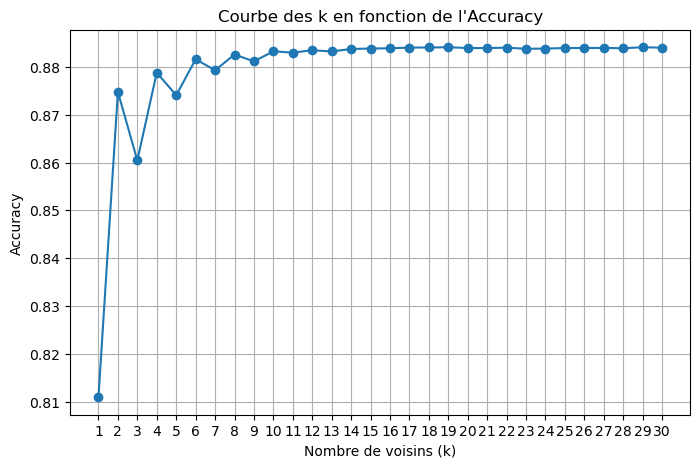

In [185]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Courbe des k en fonction de l\'Accuracy')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()



In [188]:
# Trouver le meilleur k 
best_k_index = accuracy_scores.index(max(accuracy_scores))
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

# Afficher le meilleur k et son accuracy
print(f"\nLe meilleur k est {best_k} avec une accuracy de {best_accuracy:.4f}.")


Le meilleur k est 19 avec une accuracy de 0.8841.


In [189]:
# Évaluation finale sur l'ensemble de test
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_preprocessed, y_train)  
y_pred= knn.predict(X_test_preprocessed)

# Rapport de classification final pour KNN
print("\nRapport de classification final pour KNN :\n")
print(classification_report(y_test, y_pred))


Rapport de classification final pour KNN :

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.59      0.02      0.03      8924

    accuracy                           0.88     76605
   macro avg       0.74      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605



#### Commentaire
Le rapport de classification pour votre modèle KNN montre une forte précision globale avec une accuracy de 88%. 

**Classe 1 (Majoritaire: Default = 0)** :
Le modèle identifie presque parfaitement la classe majoritaire (classe 0), avec un rappel de 100%, ce qui signifie qu'il détecte correctement toutes les instances de cette classe. Le F1-score élevé montre un bon équilibre entre précision et rappel pour cette classe.

**Classe 1 (Minoritaire: Default = 1)** :

Le modèle a beaucoup de mal à identifier correctement la classe minoritaire (classe 1). Un rappel de seulement 2% signifie que la grande majorité des instances de cette classe ne sont pas détectées. Le faible F1-score de 0,03 indique une performance très insuffisante pour cette classe.

**Moyennes macro et pondérées** :
   - **Macro avg** : Le modèle a une performance déséquilibrée entre les classes, avec des scores faibles pour la classe minoritaire.
   - **Weighted avg** : Bien que la précision pondérée soit assez élevée (0,85), cela est principalement dû à la bonne performance sur la classe majoritaire.


<Figure size 600x600 with 0 Axes>

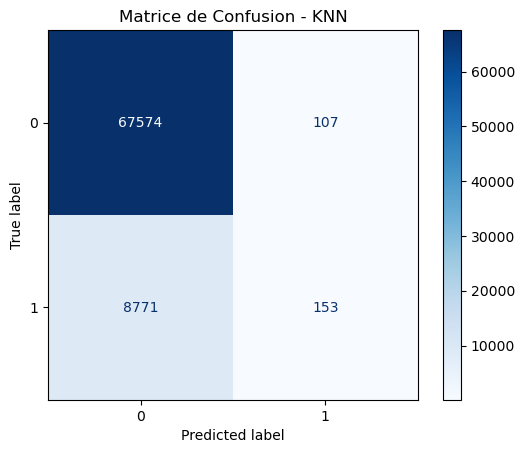

In [191]:
# Matrice de confusion
knn_cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion 
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(knn_cm).plot(cmap='Blues')
plt.title('Matrice de Confusion - KNN')
plt.show()

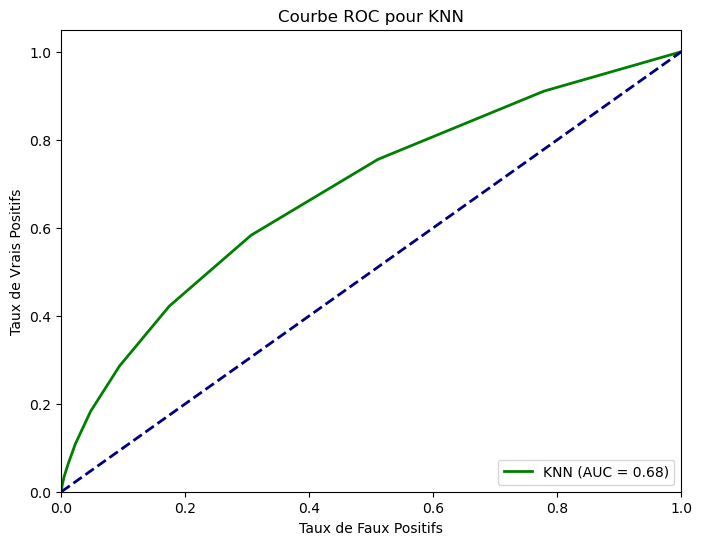

In [192]:
# Courbe ROC 
knn_y_test_proba = knn.predict_proba(X_test_preprocessed)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_test_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Affichage de la courbe ROC 
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour KNN')
plt.legend(loc="lower right")
plt.show()

##### Commentaire

Aire sous la courbe est de 68%

#### 2- MODELES: Régression Logistique, XGBoost, ADABoost (avec validation croisée)

In [193]:
# ---- Modèle 2 : Régression Logistique ----

logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Liste scores de prédiction
logistic_recall_scores = []
logistic_y_pred_all = []  # stocker les prédictions la LR


n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lancer la CV
with alive_bar(n_splits, title="Évaluation du modèle Régression Logistique", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle 
        logistic_model.fit(X_train_fold_preprocessed, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        logistic_y_pred_all.extend(logistic_y_pred_fold)

        # Calcul du rappel
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen 
mean_logistic_recall = np.mean(logistic_recall_scores)
print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")

# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
logistic_y_test_pred = logistic_model.predict(preprocessor.transform(X_test))

# rapport de classification final 
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 142993, Taille de Test : 35749 ---            
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.94      0.68      0.79     31603
                 1       0.22      0.69      0.33      4146
      
          accuracy                           0.68     35749
         macro avg       0.58      0.68      0.56     35749
      weighted avg       0.86      0.68      0.73     35749
on 1:                                                                           
      -------------------- Pli 2 -----------------
on 1: --- Taille d'Entraînement : 142993, Taille de Test : 35749 ---            
on 1:                                                               

**Performance Générale** :

- **Précision**:

Pour la classe 0 (non-défaut): La précision élevée de 94% démontre que le modèle est très compétent pour identifier correctement les cas où il n'y aura pas de défaut de remboursement. 

Pour la classe 1 (défaut): La précision faible de 22% signifie que de nombreuses prédictions de défaut de paiement sont erronées, résultant en un nombre potentiellement élevé de refus de prêt pour des individus qui auraient pu respecter leurs engagements.

- **Rappel (Sensibilité)** :

Pour la classe 0: Le rappel de 67-68% indique que le modèle identifie environ deux tiers des vrais cas de "non-défaut".On peut chercher à  améliorer le modèle pour éviter de classer à tort des clients qui sont non risqués comme  étant des clients risqués.

Pour la classe 1: Un rappel(sensiblité)  de 69% est particulièrement important dans le secteur des prêts, car il montre que le modèle est capable de détecter la majorité des vrais cas de défaut, ce qui est crucial pour prévenir les pertes financières importantes.

- **Score F1** :

Pour la classe 0: Le score F1  est d'environ 0.79. Cela indique un bon équilibre entre la précision et le rappel(sensibilité), ce qui est bénéfique pour évaluer de manière fiable les emprunteurs à faible risque.

Pour la classe 1: Le score F1 est de 0.33 . CEtte faible valeur montre que le modèle à des difficultés pour maintenir un équilibre entre  le rappel élevé avec la faible précision pour les cas de défaut.

- **Exactitude (Accuracy)** :
Globale: L'exactitude d'environ 68% montre que le modèle est raisonnablement bon pour prédire correctement les résultats des prêts en général.

In [194]:
# ---- Modèle 3 : XGBoost et AdaBoost ----
from sklearn.tree import DecisionTreeClassifier

xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss')
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Liste scores
xgb_recall_scores = []
ada_recall_scores = []
xgb_y_pred_all = []  # Pour stocker les prédictions du modèle XGBoost
ada_y_pred_all = []  # Pour stocker les prédictions de l'AdaBoost

# Appliquer la validation croisée sur chaque modèle XGBoost et AdaBoost
with alive_bar(n_splits, title="Évaluation des modèles XGBoost et AdaBoost", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Prétraiter les données
        X_train_fold_preprocessed = preprocessor.fit_transform(X_train_fold)
        X_test_fold_preprocessed = preprocessor.transform(X_test_fold)

        # Entraîner le modèle XGBoost
        xgb_model.fit(X_train_fold_preprocessed, y_train_fold)
        xgb_y_pred_fold = xgb_model.predict(X_test_fold_preprocessed)

        # Entraîner le modèle AdaBoost
        ada_model.fit(X_train_fold_preprocessed, y_train_fold)
        ada_y_pred_fold = ada_model.predict(X_test_fold_preprocessed)

        # Ajouter les vraies étiquettes et les prédictions
        xgb_y_pred_all.extend(xgb_y_pred_fold)
        ada_y_pred_all.extend(ada_y_pred_fold)

        # Calculer le score de rappel pour chaque modèle
        xgb_recall = recall_score(y_test_fold, xgb_y_pred_fold)
        xgb_recall_scores.append(xgb_recall)

        ada_recall = recall_score(y_test_fold, ada_y_pred_fold)
        ada_recall_scores.append(ada_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nXGBoost :\n")
        print(classification_report(y_test_fold, xgb_y_pred_fold))
        print("\nAdaBoost :\n")
        print(classification_report(y_test_fold, ada_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour chaque modèle
mean_xgb_recall = np.mean(xgb_recall_scores)
mean_ada_recall = np.mean(ada_recall_scores)

print(f"\nLe rappel moyen pour XGBoost sur {n_splits} plis est : {mean_xgb_recall:.3f}")
print(f"Le rappel moyen pour AdaBoost sur {n_splits} plis est : {mean_ada_recall:.3f}")



on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 142993, Taille de Test : 35749 ---            
on 0:                                                                           
      XGBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.94      0.70      0.80     31603
                 1       0.22      0.65      0.33      4146
      
          accuracy                           0.69     35749
         macro avg       0.58      0.67      0.56     35749
      weighted avg       0.85      0.69      0.75     35749
on 0:                                                                           
      AdaBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.90      0.88      0.89     31603
                 1       0.20      0.22      0.21

**XGBoost** :

- **Précision**:

Pour la classe 0 (non-défaut): Très élevée à 94%, indiquant une excellente capacité du modèle à identifier correctement les cas de non-défaut.

Pour la classe 1 (défaut):  Bas à 22%, indiquant un nombre élevé de fausses alarmes où des clients sont incorrectement prédits comme risqués.

- **Rappel (Sensibilité)** :

Pour la classe 0: Plus modéré à environ 69-70%, ce qui signifie que le modèle manque environ 30% des vrais cas de non-défaut, classifiant potentiellement des clients solvables comme à risque.

Pour la classe 1: Élevé à environ 64-65%, démontrant une bonne capacité à détecter les cas réels de défaut.

-**Global** :

**Exactitude(Accuracy)** : À 69%, montre que le modèle prédit correctement les résultats des prêts dans environ 7 cas sur 10. Le F1-score pour la classe 0 est bon (0.80), mais pour la classe 1, il est relativement bas (0.33). 

**AdaBoost** :

- **Précision**:

Pour la classe 0 (non-défaut): Élevée à 90%, bien que légèrement inférieure à celle de XGBoost.

Pour la classe 1 (défaut):  Également basse à environ 20%, similaire à XGBoost, ce qui signifie beaucoup de faux positifs dans la prédiction de défaut.

- **Rappel (Sensibilité)** :

Pour la classe 0: Très bon à 88%, mieux que XGBoost, signifiant que le modèle classe correctement la majorité des clients non risqués.

Pour la classe 1: Faible à 22-24%, ce qui est nettement inférieur à celui de XGBoost, indiquant que le modèle manque beaucoup de vrais cas de défaut.

-**Global** :

**Exactitude(Accuracy)** : Plus élevée à 80%, indiquant une meilleure performance globale dans la prédiction correcte des issues des prêts. Cependant, le F1-score pour la classe 1 reste bas (environ 0.21-0.22), tandis que pour la classe 0, il est très bon à 0.89.

XGBoost est préférable car l'objectif est de minimiser le risque de manquer des défauts de paiement (haut rappel pour la classe 1), au risque de quelques faux positifs.

In [195]:
# Évaluation finale sur l'ensemble de test non utilisé dans la CV
xgb_y_test_pred = xgb_model.predict(preprocessor.transform(X_test))
ada_y_test_pred = ada_model.predict(preprocessor.transform(X_test))

# Rapport de classification pour chaque modèle sur l'ensemble de test final
print("\nRapport de classification final pour XGBoost :\n")
print(classification_report(y_test, xgb_y_test_pred))
print("\nRapport de classification final pour AdaBoost :\n")
print(classification_report(y_test, ada_y_test_pred))



Rapport de classification final pour XGBoost :

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     67681
           1       0.22      0.65      0.33      8924

    accuracy                           0.69     76605
   macro avg       0.58      0.67      0.56     76605
weighted avg       0.85      0.69      0.74     76605


Rapport de classification final pour AdaBoost :

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67681
           1       0.19      0.23      0.21      8924

    accuracy                           0.80     76605
   macro avg       0.54      0.55      0.55     76605
weighted avg       0.81      0.80      0.81     76605



### Commentaire

#### XGBoost

**Classe 0 (Pas de Default)** :

Le modèle XGBoost est très précis pour identifier la classe majoritaire, mais son rappel de 69% indique qu'il manque encore une proportion importante de cette classe. Le F1-score de 0,80 montre un bon compromis entre précision et rappel pour la classe majoritaire.

**Classe 1 (Default)** :
   
Pour la classe minoritaire, XGBoost parvient à identifier une proportion importante des instances de cette classe (rappel de 65%), mais à un coût élevé de faux positifs, ce qui se traduit par une précision faible de 22%. Le F1-score de 0,33 indique une performance modeste pour cette classe.

**Performance globale** :

Bien que l'accuracy globale soit de 69%, le modèle XGBoost montre un équilibre relativement bon entre les deux classes, ce qui est souvent difficile à obtenir dans des scénarios de données déséquilibrées.

#### AdaBoost

**Classe 0 (Pas de Default)** :

AdaBoost montre une performance robuste sur la classe majoritaire, avec des scores de précision et de rappel très proches, ce qui conduit à un F1-score élevé de 0,89.

**Classe 1 (Default)** :
 
 AdaBoost a du mal à identifier correctement la classe minoritaire, avec une précision et un rappel faibles, ce qui donne un F1-score de seulement 0,21. Cela montre que le modèle n'est pas bien adapté pour capturer cette classe.

**Performance globale** :
   
L'accuracy globale est plus élevée que celle de XGBoost (80%), mais cela est en grande partie dû à la bonne performance sur la classe majoritaire. AdaBoost montre une performance déséquilibrée entre les classes, avec une efficacité limitée sur la classe minoritaire.



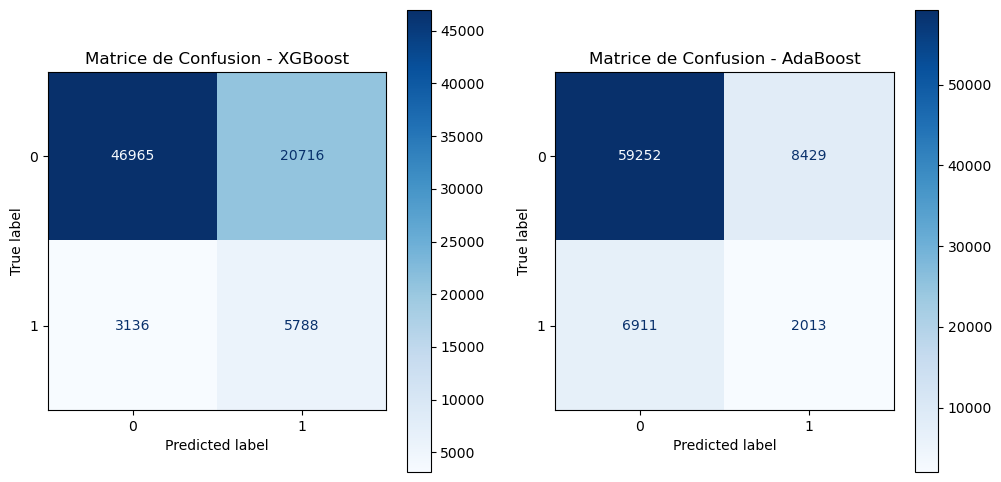

In [42]:

# Matrice de confusion pour chaque modèle
xgb_cm = confusion_matrix(y_test, xgb_y_test_pred)
ada_cm = confusion_matrix(y_test, ada_y_test_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(xgb_cm).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Matrice de Confusion - XGBoost')
ConfusionMatrixDisplay(ada_cm).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Matrice de Confusion - AdaBoost')
plt.show()


#### Matrice de Confusion de XGBoost

- **Vrais Négatifs (TN, Classe 0 prédite correctement)**: 46,965. Cela signifie que le modèle a correctement identifié 46,965 cas comme n'étant pas des défauts.

- **Faux Positifs (FP, Classe 0 prédite incorrectement comme Classe 1)**: 20,716. Le modèle a incorrectement prédit ces cas comme des défauts, ce qui pourrait conduire à des refus de prêts inutiles.

- **Faux Négatifs (FN, Classe 1 prédite incorrectement comme Classe 0)**: 3,136. Ces cas étaient des défauts réels que le modèle n'a pas réussi à détecter, un risque potentiel pour les prêteurs.

- **Vrais Positifs (VP, Classe 1 prédite correctement)**: 5,788. XGBoost a correctement identifié 5,788 défauts.

Analyse: XGBoost a une tendance notable à prédire plus fréquemment la Classe 1 (défaut), comme indiqué par le nombre élevé de faux positifs. Cela contribue à un rappel élevé mais à une faible précision pour la Classe 1. Le taux élevé de faux positifs pourrait être coûteux ou disruptif dans des contextes où les prêts sont injustement refusés.

#### Matrice de Confusion d'AdaBoost

- **Vrais Négatifs (TN)**: 59,252. AdaBoost a correctement identifié un plus grand nombre de non-défauts comparé à XGBoost.

- **Faux Positifs (FP)**: 8,429. Ce nombre inférieur de faux positifs suggère que AdaBoost est plus prudent avant de prédire un défaut.

- **Faux Négatifs (FN)**: 6,911. C'est considérablement plus élevé que dans XGBoost, indiquant qu'AdaBoost a manqué plus de défauts réels.

- **Vrais Positifs (VP)**: 2,013. Il y a moins de vrais positifs détectés par AdaBoost comparé à XGBoost.

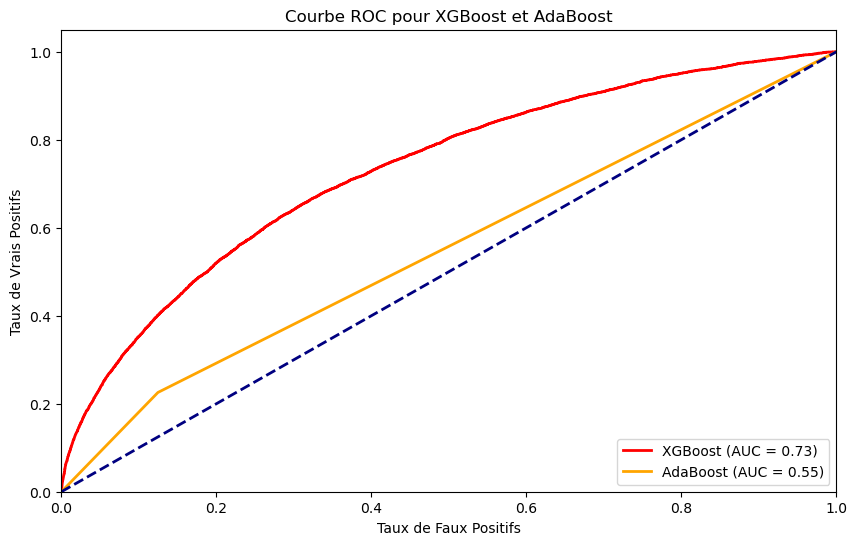

In [196]:
# Courbe ROC pour chaque modèle
xgb_y_test_proba = xgb_model.predict_proba(preprocessor.transform(X_test))[:, 1]
ada_y_test_proba = ada_model.predict_proba(preprocessor.transform(X_test))[:, 1]

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_test_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_y_test_proba)
ada_roc_auc = auc(ada_fpr, ada_tpr)

plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, color='orange', lw=2, label=f'AdaBoost (AUC = {ada_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC pour XGBoost et AdaBoost')
plt.legend(loc="lower right")
plt.show()

#### Analyse de la Courbe ROC pour XGBoost et AdaBoost

XGBoost (Courbe Rouge, AUC = 0.73) :

La courbe est nettement au-dessus de la ligne diagonale bleue (qui représente une classification aléatoire avec une AUC de 0.5), indiquant que le modèle a une bonne capacité de discrimination entre les classes positive (défaut) et négative (non-défaut).

Une AUC de 0.73 est considérée comme bonne, montrant que le modèle XGBoost a une forte probabilité de distinguer correctement entre les classes. Cela suggère que, pour un seuil donné, XGBoost offre une bonne balance entre capturer les vrais cas de défaut (haute sensibilité) et éviter de faussement prédire un défaut (bonne spécificité).

AdaBoost (Courbe Orange, AUC = 0.55) :

La courbe d'AdaBoost est proche de la ligne diagonale, indiquant une performance seulement légèrement meilleure qu'une prédiction aléatoire. Une AUC de 0.55 est généralement considérée comme faible et suggère une capacité limitée à discriminer entre les classes.

Ce résultat montre que, bien qu'AdaBoost puisse identifier correctement certaines instances, sa capacité à différencier systématiquement les cas de défaut des non-défauts est faible. 

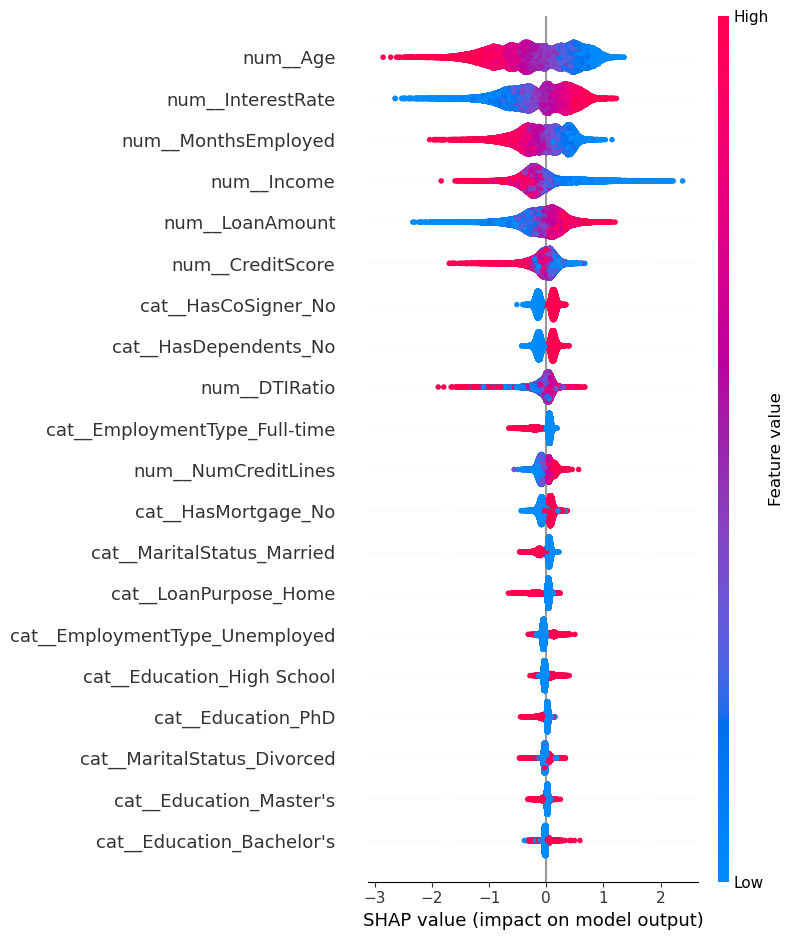

In [197]:

# ---- SHAP values pour XGBoost ----
explainer = shap.Explainer(xgb_model)
shap_values = explainer(preprocessor.transform(X_test))

# Visualiser les valeurs SHAP
shap.summary_plot(shap_values, preprocessor.transform(X_test), feature_names=preprocessor.get_feature_names_out())


#### Analyse des Valeurs SHAP

##### Distribution des Couleurs:

Bleu: Indique que des valeurs plus basses de la caractéristique contribuent à la prédiction.

Rouge: Indique que des valeurs plus élevées de la caractéristique contribuent à la prédiction.
Impact sur le Modèle (axe horizontal):

Les valeurs vers la gauche (négatives) indiquent un effet qui pousse la prédiction vers une classe ("non-défaut").

Les valeurs vers la droite (positives) indiquent un effet qui pousse la prédiction vers l'autre classe ("défaut").

##### Détails des Caractéristiques Spécifiques

- **Âge (num_Age)**:

On a une large dispersion des valeurs SHAP en bleu et rouge, suggérant que tant des âge plus jeunes que plus âgées ont des impacts variés sur les prédictions.

- **Taux d'intérêt (num_InterestRate)**:

Majoritairement rouge, indiquant que des taux d'intérêt plus élevés poussent généralement la prédiction vers la probabilité accrue de défaut.

- **Montants des prêts (num_LoanAmount)**:

Cette caractéristique montre également une influence notable avec des valeurs élevées (en rouge) augmentant la probabilité de défaut.

- **Score de crédit (num_CreditScore)**:

Principalement en bleu, ce qui suggère que des scores de crédit plus élevés réduisent la probabilité de défaut.

- **Emploi (cat_EmploymentType_Full-time et cat_EmploymentType_Unemployed)**:

Être employé à plein temps (en bleu) semble diminuer la probabilité de défaut, tandis qu'être au chômage (en rouge) l'augmente.

- **État civil et éducation** :

Les catégories liées à l'état civil et à l'éducation (divorcé, marié, différents niveaux d'éducation) montrent des impacts variés.

#### 3- Modeles avec avec Validation croisée & SMOTE (ré-échantillonnage) 

##### Utilisation de la bibliothèque SMOTE 

SMOTE (Synthetic Minority Over-sampling Technique) est une méthode largement utilisée pour traiter le problème de déséquilibre des classes dans les ensembles de données. Lorsqu'il y a un déséquilibre marqué entre les classes, comme c'est le cas dans notre dataset avec la variable cible "Default" où la classe minoritaire (défaillants) est nettement sous-représentée par rapport à la classe majoritaire (non-défaillants), des techniques peuvent aider à:

-- Améliorer  la Précision de la Modélisation

-- Prévenir le Surapprentissage (Overfitting)

-- Améliorer les Métriques de Performance 

In [198]:

# Séparation des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalisation
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encodage One-Hot
])

# Définir le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Pipeline de prétraitement et de rééchantillonnage
preprocessing_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote)
])

# Appliquer le pipeline de prétraitement et rééchantillonnage sur les données d'entraînement
X_train_resampled, y_train_resampled = preprocessing_pipeline.fit_resample(X_train, y_train)

# Initialisation des modèles
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss')

# Nombre de validations croisées: 5
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Liste pour stocker les scores de rappel (recall) et les prédictions finales
logistic_recall_scores = []
xgb_recall_scores = []
y_true_all = []                 # Pour stocker toutes les vraies étiquettes
logistic_y_pred_all = []        # Pour stocker les prédictions du modèle logistique
xgb_y_pred_all = []             # Pour stocker les prédictions du modèle XGBoost

# CV
with alive_bar(n_splits, title="Évaluation des modèles", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train_resampled, y_train_resampled), 1):
        X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
        y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

        # Entraîner le modèle de régression logistique sur chaque pli
        logistic_model.fit(X_train_fold, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold)

        # Entraîner le modèle XGBoost sur chaque pli
        xgb_model.fit(X_train_fold, y_train_fold)
        xgb_y_pred_fold = xgb_model.predict(X_test_fold)

        # Ajouter les vraies étiquettes et les prédictions
        y_true_all.extend(y_test_fold)
        logistic_y_pred_all.extend(logistic_y_pred_fold)
        xgb_y_pred_all.extend(xgb_y_pred_fold)

        # Calculer le score de rappel pour chaque modèle sur ce pli
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        xgb_recall = recall_score(y_test_fold, xgb_y_pred_fold)
        xgb_recall_scores.append(xgb_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))
        print("\nXGBoost :\n")
        print(classification_report(y_test_fold, xgb_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour chaque modèle
mean_logistic_recall = np.mean(logistic_recall_scores)
mean_xgb_recall = np.mean(xgb_recall_scores)

print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")
print(f"Le rappel moyen pour XGBoost sur {n_splits} plis est : {mean_xgb_recall:.3f}")


on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 288838, Taille de Test : 72210 ---            
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.70      0.68      0.69     36105
                 1       0.69      0.71      0.70     36105
      
          accuracy                           0.69     72210
         macro avg       0.69      0.69      0.69     72210
      weighted avg       0.69      0.69      0.69     72210
on 0:                                                                           
      XGBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.95      0.61      0.74     36105
                 1       0.71      0

**Interprétation des Résultats** :

- **Régression Logistique**

**Précision**: Les valeurs oscillent autour de 69-70% pour les deux classes, indiquant une capacité modérée du modèle à identifier correctement les positives (défaut) et les négatives (non-défaut).

**Rappel**: Le rappel moyen est de 70.5%. Cela signifie que le modèle a pu identifier correctement environ 70.5% des cas réels de défaut à travers les différents tests. 

**Exactitude**: L'exactitude générale du modèle reste stable autour de 69-70% pour tous les plis, indiquant une performance constante du modèle indépendamment de la variation des données de test.

- **XGBoost**

**Précision**: Il y a une grande disparité entre la précision pour les prédictions des classes positives (environ 71%) et négatives (jusqu'à 95%), indiquant que le modèle est plus fiable pour prédire les non-défauts mais moins précis pour les cas de défaut.

**Rappel**: Le rappel  moyen très élevé (96.5%) pour XGBoost . Cela indique que le modèle est extrêmement compétent à détecter les vrais cas de défaut, capturant presque tous les cas positifs réels.

**Exactitude**: L'exactitude est significativement plus élevée pour XGBoost, se maintenant autour de 78-79%. Cette valeur plus élevée est influencée par le rappel élevé et la bonne gestion des prédictions des classes positives.

In [199]:
# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)

# Prédictions finales pour chaque modèle
logistic_y_test_pred = logistic_model.predict(X_test_preprocessed)
logistic_y_test_proba = logistic_model.predict_proba(X_test_preprocessed)[:, 1]
xgb_y_test_pred = xgb_model.predict(X_test_preprocessed)
xgb_y_test_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]


# Affichage du rapport de classification pour chaque modèle sur l'ensemble de test final
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))
print("\nRapport de classification final pour XGBoost :\n")
print(classification_report(y_test, xgb_y_test_pred))



Rapport de classification final pour la Régression Logistique :

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45170
           1       0.22      0.69      0.34      5900

    accuracy                           0.69     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.69      0.74     51070


Rapport de classification final pour XGBoost :

              precision    recall  f1-score   support

           0       0.95      0.61      0.74     45170
           1       0.20      0.73      0.31      5900

    accuracy                           0.62     51070
   macro avg       0.57      0.67      0.53     51070
weighted avg       0.86      0.62      0.69     51070



#### Commentaire (Données de test)

**Précision du Classement** :
   - **Régression Logistique** : La précision globale est plus élevée pour la classe majoritaire (Pas de Defaut) à 0,94, mais nettement plus faible pour la classe minoritaire (classe 1) à 0,22.
   - **XGBoost** : Montre une performance similaire en termes de précision pour la classe 0 (0,95), mais encore une fois faible pour la classe 1 (0,20).

**Rappel (Recall)** :
   - **Régression Logistique** : Le rappel pour la classe 1 (Default) est de 0,69, ce qui est relativement bon et montre que le modèle réussit à identifier la majorité des exemples de la classe 1.
   - **XGBoost** : Le modèle a un rappel similaire pour la classe 1 (Default) (0,73). Il détecte un peu plus de cas positifs que la Régression Logistique.

**Score F1** :
   - **Régression Logistique** : Le score F1 est de 0,34 pour la classe 1

   - **XGBoost** : Le score F1 est légèrement inférieur à 0,31 pour la classe 1, suggérant une performance légèrement inférieure dans l'équilibre précision-rappel par rapport à la Régression Logistique.

4. **Précision Globale (Accuracy)** :
   - **Régression Logistique** : La précision globale est de 0,69, indiquant que le modèle classe correctement 69 % des instances.
   - **XGBoost** : La précision globale est un peu plus faible à 0,62.

### Conclusion :
- **Régression Logistique** semble mieux équilibrer la classification des deux classes, surtout en termes de rappel pour la classe minoritaire (classe 1).
- **XGBoost** a un rappel légèrement meilleur pour la classe 1, mais au prix d'une précision globale plus faible.



Matrice de Confusion pour la Régression Logistique :
 [[30934 14236]
 [ 1840  4060]]

Matrice de Confusion pour XGBoost :
 [[27556 17614]
 [ 1598  4302]]


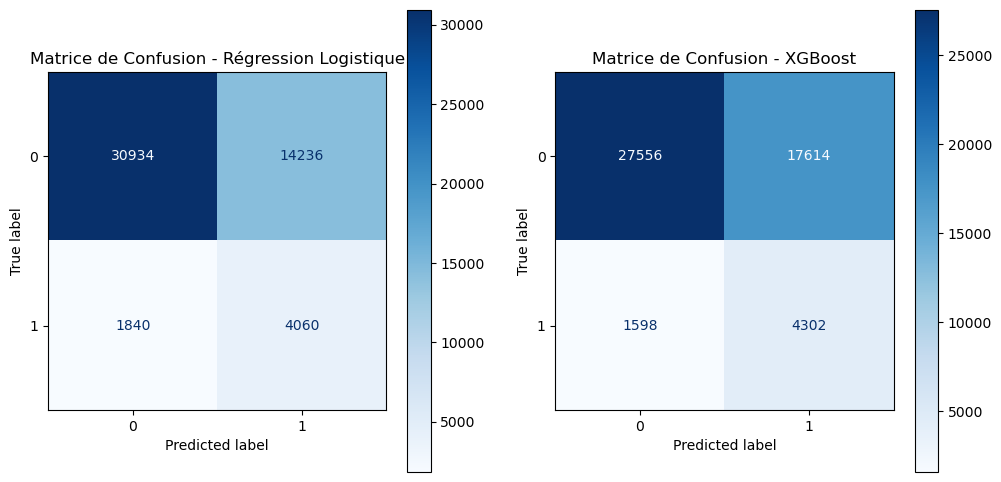

In [200]:
# Matrice de confusion pour chaque modèle
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_test_pred)

print("\nMatrice de Confusion pour la Régression Logistique :\n", logistic_cm)
print("\nMatrice de Confusion pour XGBoost :\n", xgb_cm)

# Affichage graphique de MC
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(logistic_cm).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Matrice de Confusion - Régression Logistique')
ConfusionMatrixDisplay(xgb_cm).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Matrice de Confusion - XGBoost')
plt.show()

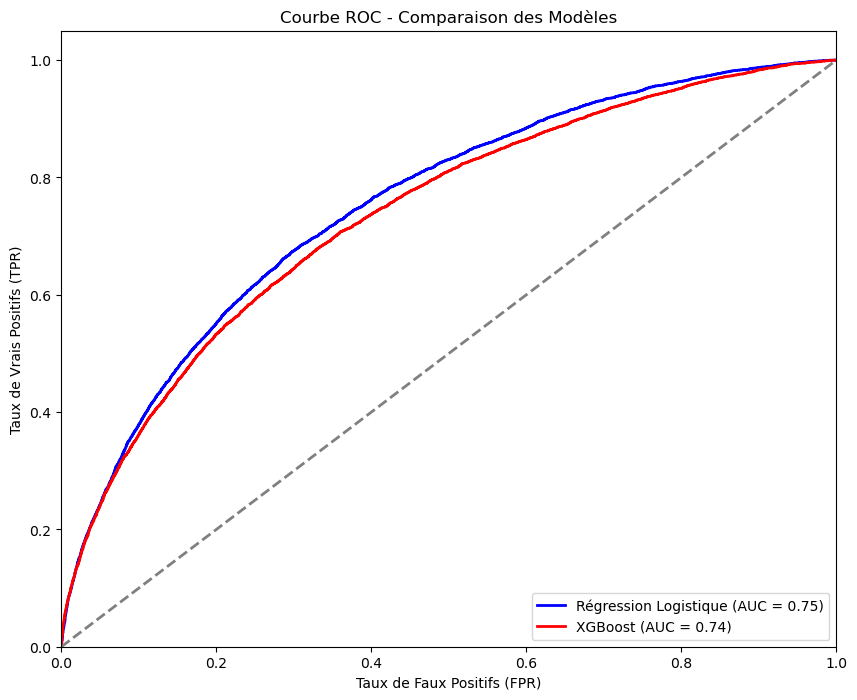

In [201]:
# Courbe ROC pour chaque modèle
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_y_test_proba)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_test_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Régression Logistique (AUC = {logistic_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Comparaison des Modèles')
plt.legend(loc="lower right")
plt.show()


**Analyse des Courbes de ROC**

Régression Logistique (Bleu) avec AUC = 0.75:L'Aire Sous la Courbe (AUC) de 0.75 suggère une bonne performance.

XGBoost (Rouge) avec AUC = 0.74:Avec une AUC de 0.74, le modèle montre également une bonne capacité de classification, quoiqu'un peu inférieure à celle de la Régression Logistique.

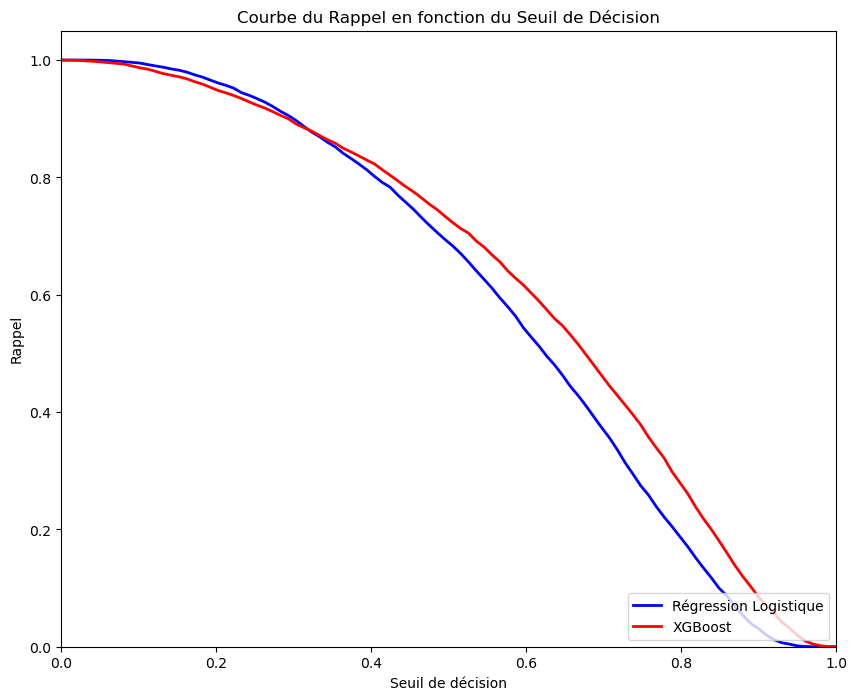

In [202]:

# Courbe du rappel pour chaque modèle
thresholds = np.linspace(0, 1, 100)
logistic_recalls = []
xgb_recalls = []

for threshold in thresholds:
    logistic_y_test_pred_thresh = (logistic_y_test_proba >= threshold).astype(int)
    xgb_y_test_pred_thresh = (xgb_y_test_proba >= threshold).astype(int)
    
    logistic_recalls.append(recall_score(y_test, logistic_y_test_pred_thresh))
    xgb_recalls.append(recall_score(y_test, xgb_y_test_pred_thresh))

plt.figure(figsize=(10, 8))
plt.plot(thresholds, logistic_recalls, color='blue', lw=2, label='Régression Logistique')
plt.plot(thresholds, xgb_recalls, color='red', lw=2, label='XGBoost')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Seuil de décision')
plt.ylabel('Rappel')
plt.title('Courbe du Rappel en fonction du Seuil de Décision')
plt.legend(loc="lower right")
plt.show()


#### Commentaire 

La courbe montre le rappel pour la Régression Logistique et XGBoost en fonction du seuil de décision. 

Le rappel diminue pour les deux modèles à mesure que le seuil augmente. La Régression Logistique maintient un rappel légèrement supérieur à celui de XGBoost jusqu'à un certains seuil(0.3) puis celui de xgboost réprend le cap. 

##### 4- Utilisation de  SMOTE ET RandomUnderSampler pour pré-etraiter les données et entrainer nos modèles(Logistique et XGBoost)

##### Pourquoi SMOTE + RandomUnderSampler

L'objectif d'utiliser à la fois **SMOTE** (Synthetic Minority Over-sampling Technique) et **RandomUnderSampler** est de rééquilibrer les classes d'un jeu de données déséquilibré. SMOTE augmente la classe minoritaire(Default) en générant des exemples synthétiques, tandis que RandomUnderSampler réduit la classe majoritaire(Pas de Defaut) en supprimant des exemples. Ensemble, ils créent un dataset plus équilibré en termes de représentation des classes, ce qui permet d'améliorer la performance des modèles de machine learning sur des données initialement déséquilibrées.

In [203]:
# Définir les transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalisation
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encodage One-Hot
])

# Définir le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICS),
        ('cat', categorical_transformer, CATEGORICALS)
    ])

# Initialiser SMOTE et RandomUnderSampler
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

# Pipeline de prétraitement et de rééchantillonnage
resampling_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('undersample', undersample)
])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [204]:

# Appliquer le pipeline de prétraitement et rééchantillonnage sur les données d'entraînement
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Initialiser les modèles
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=9, use_label_encoder=False, eval_metric='logloss')

# Nombre de validations croisées: 5
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Liste pour stocker les scores de rappel (recall) et les prédictions finales
logistic_recall_scores = []
xgb_recall_scores = []
y_true_all = []  # Pour stocker toutes les vraies étiquettes
logistic_y_pred_all = []  # Pour stocker les prédictions du modèle logistique
xgb_y_pred_all = []  # Pour stocker les prédictions du modèle XGBoost

with alive_bar(n_splits, title="Évaluation des modèles", force_tty=True) as bar:
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_train_resampled, y_train_resampled), 1):
        X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
        y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

        # Entraîner le modèle de régression logistique sur chaque pli
        logistic_model.fit(X_train_fold, y_train_fold)
        logistic_y_pred_fold = logistic_model.predict(X_test_fold)

        # Entraîner le modèle XGBoost sur chaque pli
        xgb_model.fit(X_train_fold, y_train_fold)
        xgb_y_pred_fold = xgb_model.predict(X_test_fold)

        # Ajouter les vraies étiquettes et les prédictions
        y_true_all.extend(y_test_fold)
        logistic_y_pred_all.extend(logistic_y_pred_fold)
        xgb_y_pred_all.extend(xgb_y_pred_fold)

        # Calculer le score de rappel pour chaque modèle sur ce pli
        logistic_recall = recall_score(y_test_fold, logistic_y_pred_fold)
        logistic_recall_scores.append(logistic_recall)

        xgb_recall = recall_score(y_test_fold, xgb_y_pred_fold)
        xgb_recall_scores.append(xgb_recall)

        # Afficher les informations du pli et le rapport de classification
        print(f"\n-------------------- Pli {fold_index} -----------------")
        print(f"--- Taille d'Entraînement : {len(y_train_fold)}, Taille de Test : {len(y_test_fold)} ---")
        print("\nRégression Logistique :\n")
        print(classification_report(y_test_fold, logistic_y_pred_fold))
        print("\nXGBoost :\n")
        print(classification_report(y_test_fold, xgb_y_pred_fold))

        bar()
        time.sleep(0.005)

# Calculer et afficher le rappel moyen pour chaque modèle
mean_logistic_recall = np.mean(logistic_recall_scores)
mean_xgb_recall = np.mean(xgb_recall_scores)

print(f"\nLe rappel moyen pour la Régression Logistique sur {n_splits} plis est : {mean_logistic_recall:.3f}")
print(f"Le rappel moyen pour XGBoost sur {n_splits} plis est : {mean_xgb_recall:.3f}")

on 0:                                                                           
      -------------------- Pli 1 -----------------
on 0: --- Taille d'Entraînement : 288888, Taille de Test : 72222 ---            
on 0:                                                                           
      Régression Logistique :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.70      0.68      0.69     36111
                 1       0.69      0.71      0.70     36111
      
          accuracy                           0.69     72222
         macro avg       0.69      0.69      0.69     72222
      weighted avg       0.69      0.69      0.69     72222
on 0:                                                                           
      XGBoost :
on 0:               precision    recall  f1-score   support                     
      
                 0       0.95      0.60      0.74     36111
                 1       0.71      0

#### Commentaire

Les résultats montrent que XGBoost surpasse la Régression Logistique en termes de rappel avec une moyenne de 0.965 contre 0.705 pour la Régression Logistique, indiquant une meilleure capacité de XGBoost à identifier les cas positifs. XGBoost a également une meilleure exactitude globale à 0.79 contre 0.69-0.70 pour la Régression Logistique. 

Cependant, XGBoost présente un taux élevé de faux positifs, comme en témoigne sa précision inférieure pour la classe 1 comparée à sa capacité à identifier correctement les non-défauts (classe 0).

In [205]:
# Évaluation finale sur l'ensemble de test non utilisé dans la validation croisée
X_test_preprocessed = preprocessor.transform(X_test)

logistic_y_test_pred = logistic_model.predict(X_test_preprocessed)
logistic_y_test_proba = logistic_model.predict_proba(X_test_preprocessed)[:, 1]
xgb_y_test_pred = xgb_model.predict(X_test_preprocessed)
xgb_y_test_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Affichage du rapport de classification pour chaque modèle sur l'ensemble de test final
print("\nRapport de classification final pour la Régression Logistique :\n")
print(classification_report(y_test, logistic_y_test_pred))
print("\nRapport de classification final pour XGBoost :\n")
print(classification_report(y_test, xgb_y_test_pred))


Rapport de classification final pour la Régression Logistique :

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.69      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070


Rapport de classification final pour XGBoost :

              precision    recall  f1-score   support

           0       0.95      0.60      0.74     45139
           1       0.20      0.73      0.31      5931

    accuracy                           0.62     51070
   macro avg       0.57      0.67      0.52     51070
weighted avg       0.86      0.62      0.69     51070



#### Commentaire 

Les rapports de classification finaux pour la Régression Logistique et XGBoost sur l'ensemble de test non utilisé dans la validation croisée montrent des aspects intéressants de la performance de chaque modèle, notamment en termes de précision, de rappel et de score F1. 

- **Régression Logistique**

**Précision**:

Classe 0 (Non-Défaut): Élevée à 94%, indiquant que le modèle est très compétent pour identifier correctement les cas sans défaut.

Classe 1 (Défaut): Bas à 22%, suggérant que beaucoup de prédictions de défauts sont fausses positives.

**Rappel**:

Classe 0: Modéré à 68%, ce qui signifie que le modèle manque environ un tiers des cas réels de non-défaut.

Classe 1: Élevé à 69%, indiquant une bonne capacité à identifier les vrais cas de défaut.

**F1-Score**:

Classe 0: Bon à 0.79, reflétant un équilibre raisonnable entre précision et rappel pour les prédictions de non-défaut.

Classe 1: Modeste à 0.34, impacté négativement par la faible précision.

**Exactitude Globale**: À 69%, ce qui montre une performance générale raisonnable du modèle.

- **XGBoost**

**Précision**:

Classe 0: Très élevée à 95%, similaire à celle de la Régression Logistique pour cette classe.

Classe 1: Encore plus basse que celle de la Régression Logistique à 20%, indiquant un nombre encore plus élevé de faux positifs pour les cas de défaut.

**Rappel**

Classe 0 (Pas de Defaut): Bas à 61%, ce qui est inférieur à la Régression Logistique, signifiant que XGBoost manque plus de cas réels de non-défaut.

Classe 1 (Defaut): Très élevé à 73%, légèrement meilleur que la Régression Logistique, montrant que XGBoost est légèrement plus efficace pour détecter les vrais défauts.

**F1-Score**:

Classe 0 (Pas de Defaut): À 0.74, affecté par le rappel inférieur.

Classe 1 (Defaut): À 0.31, aussi impacté par la très faible précision.

**Exactitude Globale**: Inférieure à celle de la Régression Logistique à 62%.

Régression Logistique est plus équilibré en termes de gestion des deux classes, offrant une meilleure exactitude globale.

XGBoost, malgré sa précision élevée pour la classe 0, montre des difficultés en termes de rappel pour cette même classe, mais excelle dans la détection de la classe 1 ce qui est très interessant.


Matrice de Confusion pour la Régression Logistique :
 [[30767 14372]
 [ 1827  4104]]

Matrice de Confusion pour XGBoost :
 [[27281 17858]
 [ 1584  4347]]


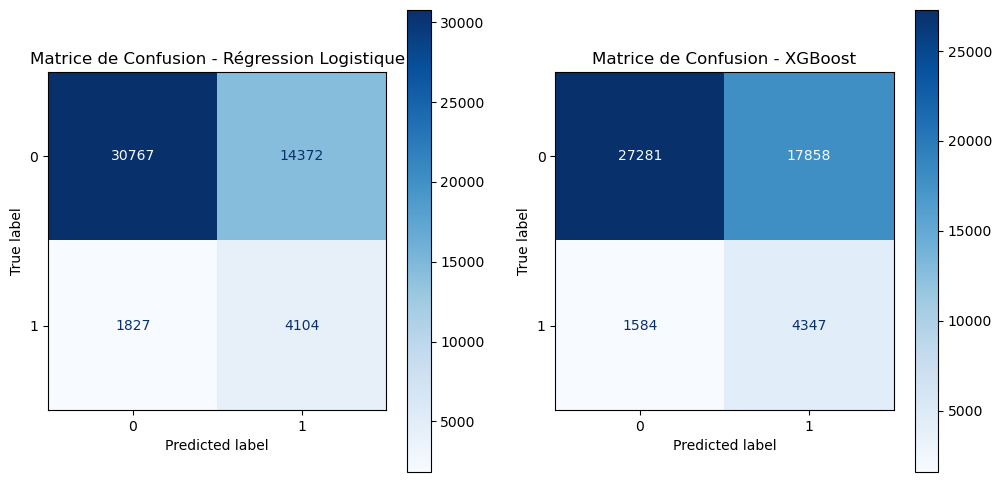

In [206]:
# Matrice de confusion pour chaque modèle
logistic_cm = confusion_matrix(y_test, logistic_y_test_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_test_pred)

print("\nMatrice de Confusion pour la Régression Logistique :\n", logistic_cm)
print("\nMatrice de Confusion pour XGBoost :\n", xgb_cm)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(logistic_cm).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Matrice de Confusion - Régression Logistique')
ConfusionMatrixDisplay(xgb_cm).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Matrice de Confusion - XGBoost')
plt.show()

- **Régression Logistique**

**Vrais Négatifs (TN)**: Le modèle a correctement prédit 30,767 cas non-défaut.

**Faux Positifs (FP)**: Le modèle a incorrectement prédit ces cas comme étant des défauts.

**Faux Négatifs (FN)**: Le modèle a manqué 1,827 cas réels de défaut, les classant à tort comme non-défauts.

**Vrais Positifs (VP)**: Le modèle a correctement identifié 4,104 cas de défaut.

***Analyse***:
Le modèle a un taux relativement élevé de faux positifs, ce qui peut être problématique dans des contextes où les faux postifs ont des conséquences coûteuses.
Le rappel est assez bon (69% des cas de défaut sont identifiés), mais la précision pour la classe 1 est basse, ce qui est cohérent avec le rapport de classification précédent (22% de précision pour les défauts).

- **XGBoost**

**Vrais Négatifs (TN)**: Le modèle a correctement prédit 27,281 cas non-défaut.

**Faux Positifs (FP)**: Le modèle a incorrectement prédit ces cas comme étant des défauts.

**Faux Négatifs (FN)**: Le modèle a manqué 1,584 cas réels de défaut.

**Vrais Positifs (VP)**: Le modèle a correctement identifié 4,347 cas de défaut.

***Analyse***:

XGBoost montre un nombre significativement plus élevé de faux positifs par rapport à la Régression Logistique.

Le rappel est supérieur à celui de la Régression Logistique (73% contre 69%), montrant une meilleure capacité à détecter les cas de défaut. Cependant, cela vient avec un coût élevé en termes de précision.

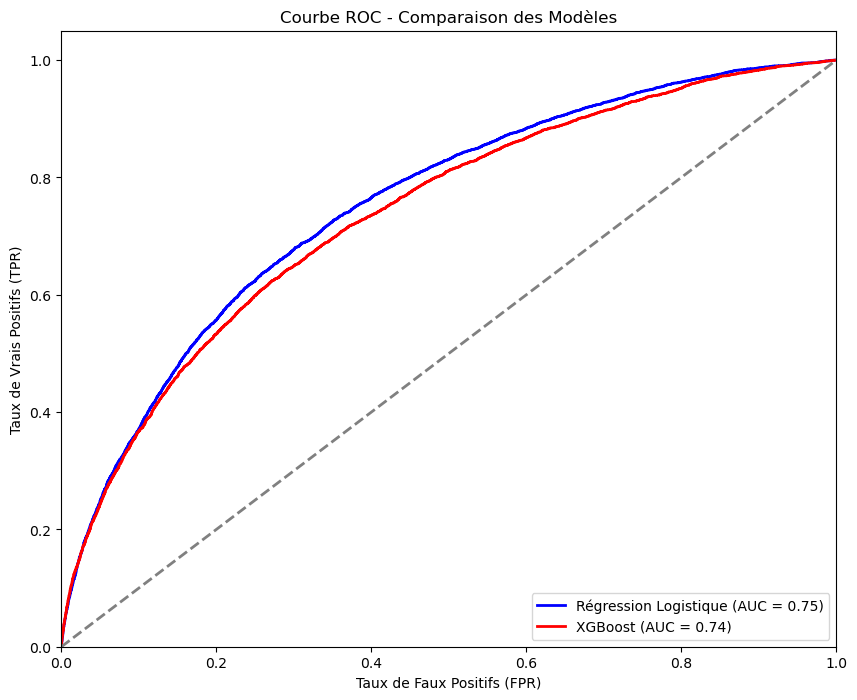

In [207]:
# Courbe ROC pour chaque modèle
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_y_test_proba)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_test_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Régression Logistique (AUC = {logistic_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Comparaison des Modèles')
plt.legend(loc="lower right")
plt.show()

#### Commentaire
La courbe ROC montre que la Régression Logistique et XGBoost ont des performances de classification similaires, avec des AUC respectifs de 0.75 et 0.74.

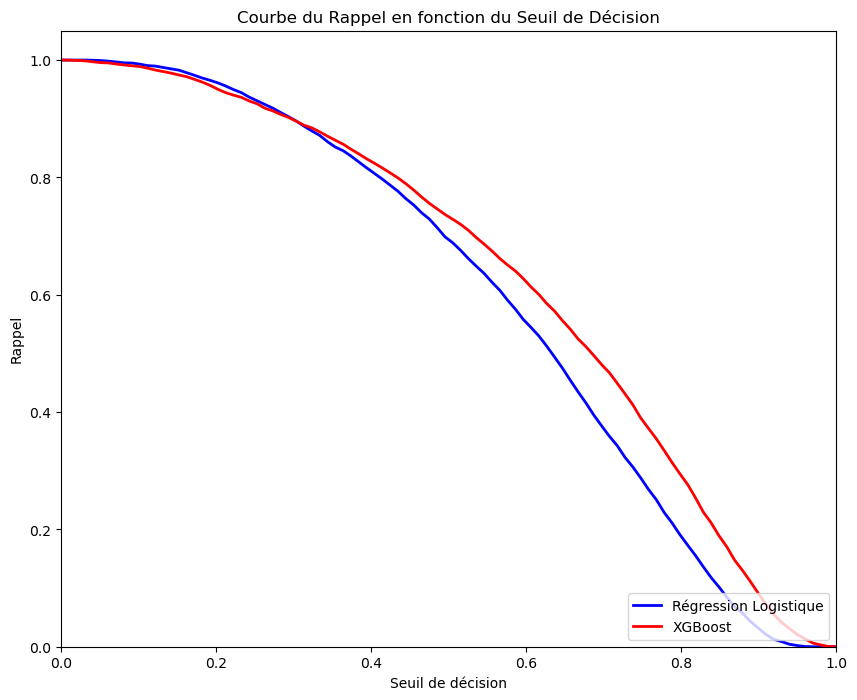

In [208]:
# Courbe du rappel pour chaque modèle
thresholds = np.linspace(0, 1, 100)
logistic_recalls = []
xgb_recalls = []

for threshold in thresholds:
    logistic_y_test_pred_thresh = (logistic_y_test_proba >= threshold).astype(int)
    xgb_y_test_pred_thresh = (xgb_y_test_proba >= threshold).astype(int)
    
    logistic_recalls.append(recall_score(y_test, logistic_y_test_pred_thresh))
    xgb_recalls.append(recall_score(y_test, xgb_y_test_pred_thresh))

plt.figure(figsize=(10, 8))
plt.plot(thresholds, logistic_recalls, color='blue', lw=2, label='Régression Logistique')
plt.plot(thresholds, xgb_recalls, color='red', lw=2, label='XGBoost')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Seuil de décision')
plt.ylabel('Rappel')
plt.title('Courbe du Rappel en fonction du Seuil de Décision')
plt.legend(loc="lower right")
plt.show()

#### Commentaire 

La courbe montre le rappel pour la Régression Logistique et XGBoost en fonction du seuil de décision. 

Le rappel diminue pour les deux modèles à mesure que le seuil augmente. La Régression Logistique maintient un rappel légèrement supérieur à celui de XGBoost jusqu'à un certains seuil(0.3) puis celui de xgboost réprend le cap. 

### INTERPRETATION DES MODELES LOGISTIQUE ET XGBoost

##### 1- Modèle XGBosst

In [209]:

# Extraire les importances des caractéristiques
xgb_feature_importance = xgb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Trier les importances
sorted_idx = np.argsort(xgb_feature_importance)
sorted_importance = xgb_feature_importance[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Créer le graphique avec Plotly
fig = go.Figure()

# Ajouter une barre pour chaque caractéristique
fig.add_trace(go.Bar(
    x=sorted_importance,
    y=sorted_features,
    orientation='h',
    marker_color='blue'
))

# Mettre à jour la mise en page
fig.update_layout(
    title='Importance des Caractéristiques - XGBoost',
    xaxis_title='Importance des caractéristiques',
    yaxis_title='Caractéristiques',
    template='plotly_white'
)

# Afficher le graphique
fig.show()


#### Interpretation 

Ce graphique montre l'importance des caractéristiques utilisées par le modèle XGBoost, classées par leur influence sur la prédiction.

 Les caractéristiques les plus influentes en haut du graphique incluent la possession d'une hypothèque (cat_HasMortgage_Yes) et le fait d'avoir des personnes à charge (cat_HasDependents_Yes), indiquant qu'elles jouent un rôle significatif dans les prédictions du modèle. 
 
 Les caractéristiques financières comme le ratio dette/revenu (num_DTiRatio) sont également importantes, mais moins que certains facteurs catégoriels, suggérant un modèle complexe où les données démographiques et de prêt sont toutes deux cruciales pour déterminer le risque de défaut.

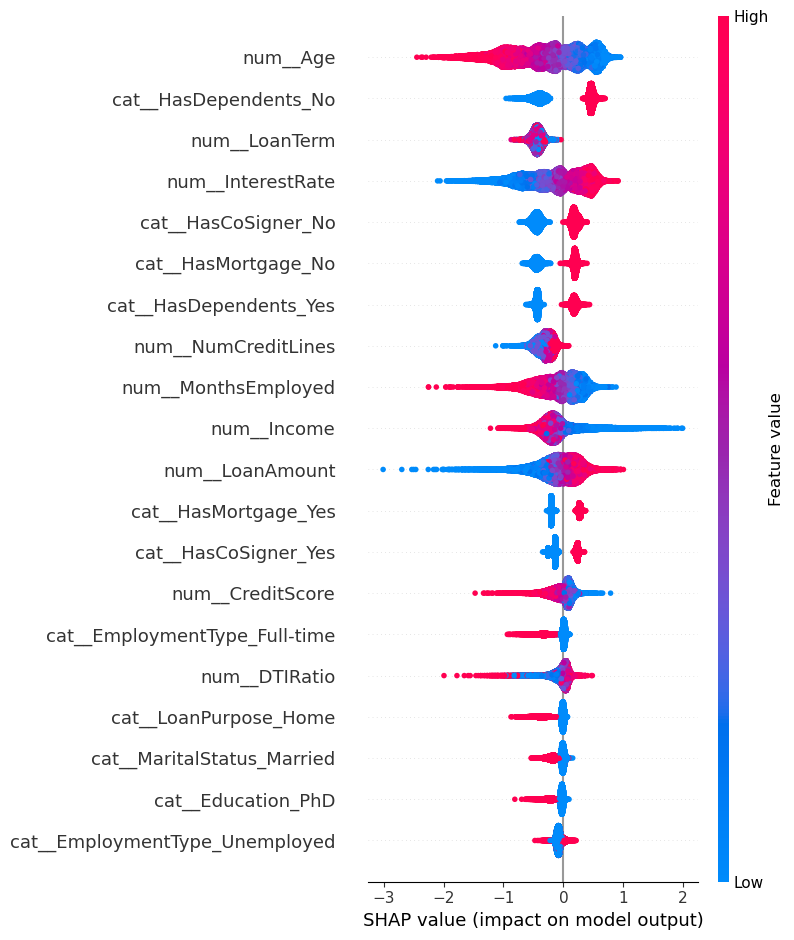

In [210]:

# SHAP values pour XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_preprocessed)

# Visualiser les valeurs SHAP avec un graphique résumé
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names)

# Créer un objet d'explication pour la première instance
single_shap_value = shap_values[0]            # Obtenir la première valeur SHAP
single_instance = X_test_preprocessed[0]      # Obtenir la première instance

# Visualisation
shap.force_plot(explainer.expected_value, single_shap_value.values, single_instance, feature_names=feature_names)


##### Interprétation du graphique :

**Axe des Y** : Liste des caractéristiques (features) du modèle. Par exemple, "num_Age" représente l'âge, "cat_HasDependents_No" indique l'absence de personnes à charge, etc.

**Axe des X** : Valeurs SHAP, qui mesurent l'impact de chaque caractéristique sur la sortie du modèle. Les valeurs négatives indiquent une diminution de la prédiction, tandis que les valeurs positives indiquent une augmentation.

**Couleurs** : La couleur des points varie du bleu (valeurs faibles) au rouge (valeurs élevées) pour chaque caractéristique.


- **"num_Age"** : Les points rouges (âges élevés) sont principalement du côté positif, ce qui signifie que des âges plus élevés augmentent la prédiction du modèle.

- **"cat_HasDependents_No"** : Beaucoup de points rouges du côté positif, indiquant que ne pas avoir de personnes à charge est associé à des prédictions plus élevées.

- **"num_InterestRate"** : Les points rouges (taux d'intérêt élevés) sont du côté négatif, ce qui signifie que des taux d'intérêt plus élevés diminuent la prédiction du modèle.

- **"num_CreditScore"** : Les points rouges (scores de crédit élevés) sont du côté positif, ce qui signifie que des scores de crédit plus élevés augmentent la prédiction du modèle.

- **"cat_EmploymentType_Unemployed"** : Les points rouges (chômage) sont du côté négatif, ce qui signifie que le chômage diminue la prédiction du modèle.




##### 2- Interpretation du modèle Logistique


In [212]:

# Extraction des coefs et des noms des features
logistic_coefficients = logistic_model.coef_[0]
feature_names = np.array(feature_names)

# Créer un DataFrame pour les coeffs
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_coefficients
})

# Calculer la valeur absolue des coeffs pour l'importance
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()

# Seuil de significativité des coéfs ( 0.05)
significant_threshold = 0.05

# Filtrer les coefs significatifs
significant_importance_df = importance_df[importance_df['Absolute_Coefficient'] > significant_threshold]

# Trier par importance absolue
significant_importance_df = significant_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Calculer la somme des coefficients significatifs
sum_significant_abs_coefficients = significant_importance_df['Absolute_Coefficient'].sum()

# Créer un score basé sur les coefficients significatifs (en pourcentage)
significant_importance_df['Score'] = (significant_importance_df['Absolute_Coefficient'] / sum_significant_abs_coefficients) * 100

# Afficher les résultats
print("Les variables significatives avec leurs scores :")
print(significant_importance_df[['Feature', 'Coefficient', 'Score']])

# couleurs pour le graphique
significant_importance_df['Color'] = significant_importance_df['Score'].apply(lambda x: 'green' if x > 0 else 'red')

# Visualisation
fig = px.bar(
    significant_importance_df,
    x='Score',
    y='Feature',
    color='Color',
    color_discrete_map={'green': 'green', 'red': 'red'},
    title='Scores des Variables Significatives - Régression Logistique',
    labels={'Score': 'Score (%)', 'Feature': 'Variable'}
)

# Ajouter une ligne verticale pour le score zéro
fig.add_shape(type="line", x0=0, x1=0, y0=-1, y1=len(significant_importance_df), line=dict(color="grey", width=2, dash="dash"))
fig.show()


Les variables significatives avec leurs scores :
                           Feature  Coefficient      Score
0                         num__Age    -0.636664  13.625845
6                num__InterestRate     0.505330  10.815043
4              num__MonthsEmployed    -0.367949   7.874815
1                      num__Income    -0.335279   7.175627
2                  num__LoanAmount     0.313013   6.699078
13   cat__EmploymentType_Full-time    -0.312025   6.677933
27           cat__LoanPurpose_Home    -0.222302   4.757687
16  cat__EmploymentType_Unemployed     0.209270   4.478783
30            cat__HasCoSigner_Yes    -0.197443   4.225671
23          cat__HasDependents_Yes    -0.194619   4.165219
18      cat__MaritalStatus_Married    -0.167664   3.588346
12              cat__Education_PhD    -0.160547   3.436020
21            cat__HasMortgage_Yes    -0.148785   3.184282
3                 num__CreditScore    -0.137199   2.936323
10      cat__Education_High School     0.127292   2.724307
11     

#### Interpretation

Le graphe montre les scores d'importance des différentes variables utilisées dans le modèle de Régression Logistique. Les barres vertes représentent le pourcentage d'impact de chaque variable sur les prédictions du modèle. 

Âge (num_Age: 13.6%) et la durée de l'emploi (num_MonthsEmployed: 10.8%) ont le plus grand impact sur les prédictions du modèle.

Le montant du Prêt (num_LoanAmount) et But du Prêt (pour une maison)  (cat_LoanPurpose_Home) sont aussi parmi les caractéristiques  influentes du modèle.

Le Ratio de Dette sur Revenu (num_DTiRatio) à un impact moins prononcé sur les prédictions du modèle ce qui est cohérant avec le résultat  de l'analyse bivariée.

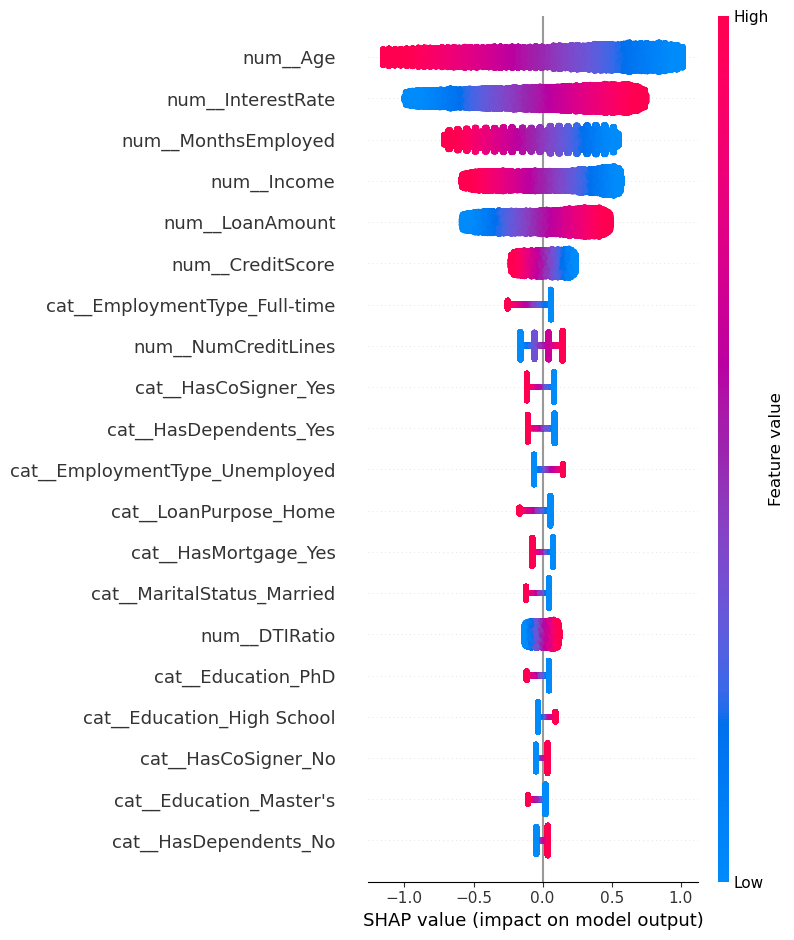

In [213]:
# Créer un explainer linéaire pour la régression logistique
explainer = shap.LinearExplainer(logistic_model, X_train_resampled)

# Calculer les valeurs SHAP  pour un ensemble de data
shap_values = explainer.shap_values(X_test_fold)

# Visualiser l'importance globale des caractéristiques avec SHAP
shap.summary_plot(shap_values, X_test_fold, feature_names=feature_names)


# Visualiser la force plot pour la première instance 
shap.force_plot(explainer.expected_value, shap_values[0], X_test_fold[0], feature_names=feature_names)


#### Interpretation

Âge ("num_Age") et Taux d'intérêt ("num_InterestRate") ont un large éventail d'impacts, tant positifs que négatifs.

Revenu ("num_Income") et Montant du prêt ("num_LoanAmount") montrent également une variation significative dans leur impact, indiquant qu'à certains niveaux, ils peuvent fortement influencer la décision du modèle. 

Score de crédit ("num_CreditScore") semble avoir une influence plutôt négative, ce qui pourrait signifier que des scores plus élevés diminuent la probabilité de la classe cible.

Les variables catégorielles comme Type d'emploi (cat_EmploymentType_Full-time) et Avoir des dépendants (cat_HasDependents_Yes) montrent des effets divers sur la prédiction.

#### Fonction pour calculer le score d'un individu et déterminer s'il est risqué

En se Basant sur les coéf de la régression logistique

In [214]:


def calculate_risk_score(individual_features):
    
    individual_features = np.array(individual_features)
    score = 0  # Point de départ pour le score

    for index, row in significant_importance_df.iterrows():
        feature_name = row['Feature']
        coefficient = row['Coefficient']
        # Ajouter au score en fonction de la valeur de la variable
        score += coefficient * individual_features[feature_names == feature_name]

    # Classifier l'individu comme risqué ou non (seuil de 50)
    risk_status = "Client Risqué" if score > 100 else "Non Risqué"

    return round(score.item(), 3), risk_status

# Saisir les données pour les variables significatives (Régression Logistique)
individual_values = {}
for feature in significant_importance_df['Feature']:
    value = input(f"Entrez la valeur pour {feature}: ")
    individual_values[feature] = float(value)  # Convertir en float

# Convertir en ordre pour correspondre aux coefficients
individual_features = [individual_values.get(feature, 0) for feature in feature_names]

# Calculer le score et le statut de risque
score, risk_status = calculate_risk_score(individual_features)
print(f"Score de risque: {score}, Statut: {risk_status}")


Score de risque: 3319.662, Statut: Client Risqué


#### FIN Partie Machine Learning

#### DeepLearning

##### Remarques

Callback personnalisé : La classe F1ScoreCallback  permet de surveiller le F1-score après chaque époque d'entraînement, ce qui peut être utile pour ajuster l'entraînement en fonction de cette métrique.


In [216]:
# Créer un préprocesseur avec un pipeline pour le traitement des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), NUMERICS),
        ('cat', OneHotEncoder(), CATEGORICALS)
    ])

# Appliquer le prétraitement
X_train_processed = preprocessor.fit_transform(X_train)

# Appliquer SMOTE sur les données prétraitées
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Définir le modèle
model = models.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback personnalisé pour F1-Score
class F1ScoreCallback(callbacks.Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_predict = (self.model.predict(self.validation_data[0]) > 0.5).astype(int)
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        print(f' — val_f1: {_val_f1:.4f}')

# Entraîner le modèle et sauvegarder l'historique
f1_callback = F1ScoreCallback(validation_data=(X_test_preprocessed, y_test))
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[f1_callback],
                    verbose=1)




Epoch 1/50
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 — val_f1: 0.2270
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5698 - loss: 113.3070 - val_accuracy: 0.1450 - val_loss: 85.7710
Epoch 2/50
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 — val_f1: 0.2160
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5915 - loss: 32.9887 - val_accuracy: 0.5347 - val_loss: 6.9212
Epoch 3/50
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 — val_f1: 0.2113
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6085 - loss: 15.0990 - val_accuracy: 0.5470 - val_loss: 3.7161
Epoch 4/50
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 — val_f1: 0.2084
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6145 - loss: 7.7671 - val_accuracy: 0.8370 - val_loss: 3.0494
Epoch 5/50
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
 — val_f1: 0.2552
9028/9028 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5790 - loss: 2.7071 - val_accuracy: 0.0000e+00 - val_loss: 0.9703
Epoch 6/50
1596/1596 ━━━━━━━━━━

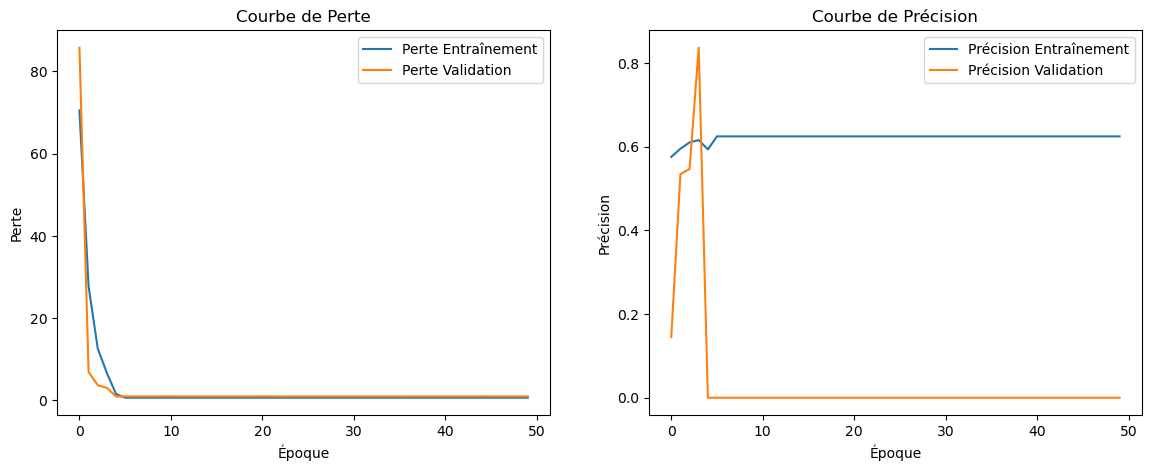

In [217]:
# Tracer les courbes d'apprentissage
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Courbe de Perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.title('Courbe de Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.show()

In [218]:
# Faire des prédictions sur les données de test
y_test_pred = (model.predict(X_test_preprocessed) > 0.5).astype(int)

# Afficher le rapport de classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de classification :\n", class_report)


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.65      0.76     45139
           1       0.17      0.54      0.26      5931

    accuracy                           0.64     51070
   macro avg       0.54      0.59      0.51     51070
weighted avg       0.83      0.64      0.70     51070



In [219]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[29310 15829]
 [ 2743  3188]]


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


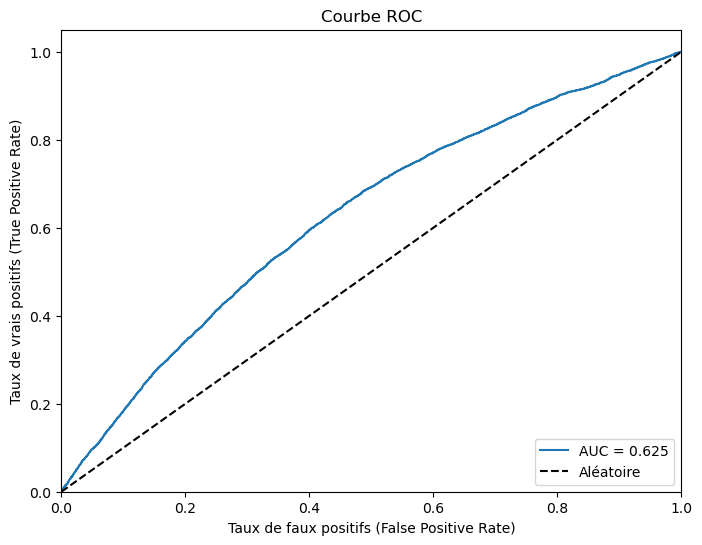

In [221]:

y_test_probs = model.predict(X_test_preprocessed).ravel()  # .ravel() pour aplatir en un seul vecteur


# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculer l'AUC
auc_score = roc_auc_score(y_test, y_test_probs)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()